In [9]:
library("matrixStats")# colMeans

library("ggplot2")
library("ggpubr")

source("analysis.utils.r")
source("simulate.expression.utils.r")

set.seed(2023)

Warning message:
“package ‘MASS’ was built under R version 4.1.3”
Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



Attaching package: ‘compositions’


The following objects are masked from ‘package:stats’:

    anova, cor, cov, dist, var


The following objects are masked from ‘package:base’:

    %*%, norm, scale, scale.default




In [1]:
source.col = "decon.L1" 
N = 500

# source.col = "decon.L2" 
# N = 500

# source.col = "decon.L1" 
# N = 250

# source.col = "decon.L1" 
# N = 100

In [2]:
max_stds = 2
project.dir = "/u/home/j/johnsonc/project-halperin/TCAx/TCAx2023/"

#relative path of the data dir to project.dir
if(source.col == "decon.L1"){
    data.dir = paste0("Data/RNA/Simulation-Lung/sc-HLCA_all.W_decon.L1_HEF.10k_k_4_m_600_n_", N, "_dirichlet_F_noiseZ_T_varThr_1e-04_filThr_1e-04_expQtl_0_enrich_F_etpRat_0_enrichRat_0_maxSds_", max_stds, "_scale.maxSds_Inf_scale.factor.thr_1e-04/")
    figure.dir  = paste0("Figure/Simulation-Lung/decon.L1.max_stds.",max_stds)
}else{
    data.dir = paste0("Data/RNA/Simulation-Lung/sc-HLCA_all.W_decon.L2_HEF.10k_k_6_m_600_n_", N, "_dirichlet_F_noiseZ_T_varThr_1e-04_filThr_1e-04_expQtl_0_enrich_F_etpRat_0_enrichRat_0_maxSds_", max_stds, "_scale.maxSds_Inf_scale.factor.thr_1e-04/")
    figure.dir  = paste0("Figure/Simulation-Lung/decon.L2.max_stds.",max_stds)
}

ts = 1:20

In [3]:
data.dir   = file.path(project.dir, data.dir)
figure.dir = file.path(project.dir, figure.dir)
data.name  = strsplit(data.dir, "/")[[1]]
res.dir    = file.path(project.dir, paste(c("Result", data.name[(length(data.name)-2) : length(data.name)]), collapse = "/"))

if (!file.exists(res.dir)){print("no result in the result directory")}
if (!file.exists(figure.dir)) {dir.create(figure.dir, recursive = T)}
print(data.dir)
print(res.dir)
print(figure.dir)

[1] "/u/home/j/johnsonc/project-halperin/TCAx/TCAx2023//Data/RNA/Simulation-Lung/sc-HLCA_all.W_decon.L1_HEF.10k_k_4_m_600_n_500_dirichlet_F_noiseZ_T_varThr_1e-04_filThr_1e-04_expQtl_0_enrich_F_etpRat_0_enrichRat_0_maxSds_2_scale.maxSds_Inf_scale.factor.thr_1e-04/"
[1] "/u/home/j/johnsonc/project-halperin/TCAx/TCAx2023//Result/RNA/Simulation-Lung/sc-HLCA_all.W_decon.L1_HEF.10k_k_4_m_600_n_500_dirichlet_F_noiseZ_T_varThr_1e-04_filThr_1e-04_expQtl_0_enrich_F_etpRat_0_enrichRat_0_maxSds_2_scale.maxSds_Inf_scale.factor.thr_1e-04"
[1] "/u/home/j/johnsonc/project-halperin/TCAx/TCAx2023//Figure/Simulation-Lung/decon.L1.max_stds.2"


# load Simluation data and result

In [4]:
sim.data.list = readRDS(file.path(data.dir, "sim.data.list.rds"))

# load TCA, baseline
tca.mdl.list  = readRDS(file.path(res.dir, paste0("tca.mdl.list.rds")))
base.mdl.list = readRDS(file.path(res.dir, paste0("base.mdl.list.rds")))
cibersortx.mdl.list = readRDS(file.path(res.dir, paste0("cibersortx.mdl.list.rds")))

bMIND_rp.mdl.list = readRDS(file.path(res.dir, paste0("bMIND.mdl.rough.prior.list.rds")))
bMIND_sc.mdl.list = readRDS(file.path(res.dir, paste0("bMIND.mdl.sc.prior.1.list.rds")))

## load TCAx
mean_penalty  = 0
var_penalty   = 0.01
covar_penalty = 0.01

pen.config = paste("mp", mean_penalty, "vp", var_penalty, "cp", covar_penalty, "maxStds", max_stds, sep =  "_")
print(pen.config)

tcax.mdl.list = readRDS(file.path(res.dir, paste0("tcax.mdl.", pen.config, ".list.rds")))

[1] "mp_0_vp_0.01_cp_0.01_maxStds_2"


In [18]:
str(bMIND_sc.mdl.list)

List of 20
 $ :List of 12
  ..$ params.hat.orig             :List of 2
  .. ..$ mus_hat   : num [1:600, 1:4] 96.5583 -0.0534 30.4845 0.8751 9.3503 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:600] "ENSG00000184990" "ENSG00000148053" "ENSG00000204713" "ENSG00000157077" ...
  .. .. .. ..$ : chr [1:4] "Immune" "Epithelial" "Endothelial" "Stroma"
  .. ..$ sigmas_hat: num [1:600, 1:4, 1:4] 2426.2 0.84 486.39 1.7 54.86 ...
  .. .. ..- attr(*, "dimnames")=List of 3
  .. .. .. ..$ : chr [1:600] "ENSG00000184990" "ENSG00000148053" "ENSG00000204713" "ENSG00000157077" ...
  .. .. .. ..$ : chr [1:4] "Immune" "Epithelial" "Endothelial" "Stroma"
  .. .. .. ..$ : chr [1:4] "Immune" "Epithelial" "Endothelial" "Stroma"
  ..$ Z.hat.orig                  : num [1:4, 1:600, 1:500] 35.6 27.4 82.5 71 0 ...
  .. ..- attr(*, "dimnames")=List of 3
  .. .. ..$ : chr [1:4] "Immune" "Epithelial" "Endothelial" "Stroma"
  .. .. ..$ : chr [1:600] "ENSG00000184990" "ENSG00000148053" "ENSG0000

# plotting

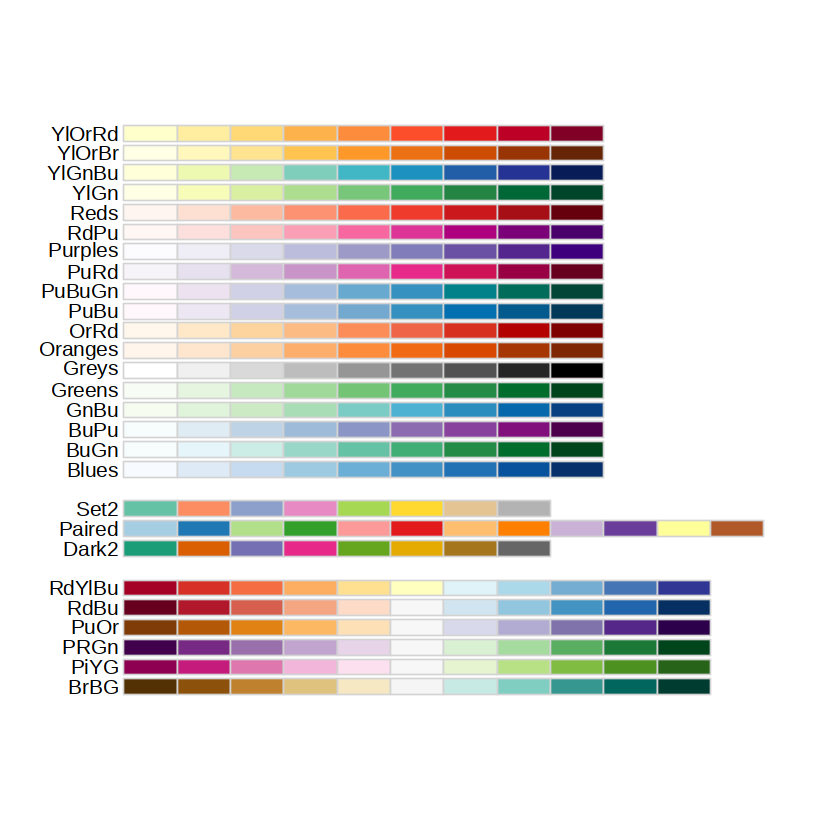

In [11]:
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)

In [12]:
base.color       = brewer.pal(n = 8, name = "Set2")[8]
cibersortx.color = brewer.pal(n = 8, name = "Set2")[5]

 
# tca.color        = brewer.pal(n = 8, name = "Set2")[3]
# bMIND_sc.color   = brewer.pal(n = 12, name = "Paired")[9]
# bMIND_rp.color   = brewer.pal(n = 12, name = "Paired")[10]

tca.color        = brewer.pal(n = 8, name = "Set2")[6]
bMIND_sc.color   = brewer.pal(n = 11, name = "RdYlBu")[10]
bMIND_rp.color   = brewer.pal(n = 8, name = "Set2")[3]
tcax.color       = brewer.pal(n = 8, name = "Set2")[4]

if (source.col == "decon.L1"){
    title.size = 30
    lab.size = 30
    legend.size = 32.5  
}else{
    title.size = 27.5
    lab.size = 27.5
    legend.size = 30    
}

In [13]:
methods = c("Baseline", "CIBERSORTx", "TCA", "bMIND_rp", "bMIND_sc", "TCAx")
colors = 
source.ids = colnames(sim.data.list[[1]]$W)
print(source.ids)
k = length(source.ids)
m = nrow(sim.data.list[[1]]$X)
n = ncol(sim.data.list[[1]]$X)

[1] "Immune"      "Epithelial"  "Endothelial" "Stroma"     


# parameters: Mean barplots

In [19]:
#keys are the method
#per key a matrix, rows are the runs
mus.corrs.list = list(
    Baseline   = concat_2_keys(base.mdl.list,       key1 ="moment.recon.corrs", key2 = "mus.rob.corrs"),                
    CIBERSORTx = concat_2_keys(cibersortx.mdl.list, key1 ="moment.recon.corrs", key2 = "mus.rob.corrs"),                    
    TCA        = concat_2_keys(tca.mdl.list,        key1 ="moment.hat.corrs",   key2 = "mus.rob.corrs"),                     
    TCAx       = concat_2_keys(tcax.mdl.list,       key1 ="moment.hat.corrs",   key2 = "mus.rob.corrs"),
    bMIND_rp   = concat_2_keys(bMIND_rp.mdl.list,   key1 ="moment.hat.corrs",   key2 = "mus.rob.corrs"),
    bMIND_sc   = concat_2_keys(bMIND_sc.mdl.list,   key1 ="moment.hat.corrs",   key2 = "mus.rob.corrs")
)

mean.barplot.df = data.frame(
    method = as.vector(vapply(1:length(methods), function(a) rep(methods[a], k), character(k))),
    source = as.vector(rep(source.ids, length(methods))),
    mean   = as.vector(vapply(1:length(methods), function(a) colMeans(mus.corrs.list[[methods[a]]]), numeric(k))),
    lb_sd  = as.vector(vapply(1:length(methods), function(a) colMeans(mus.corrs.list[[methods[a]]]) - colSds(mus.corrs.list[[methods[a]]]),  numeric(k))),
    ub_sd  = as.vector(vapply(1:length(methods), function(a) colMeans(mus.corrs.list[[methods[a]]]) + colSds(mus.corrs.list[[methods[a]]]),  numeric(k)))
)

# set some to factors so that the figures respect the order 
mean.barplot.df$source = factor(mean.barplot.df$source, levels = source.ids)
mean.barplot.df$method = factor(mean.barplot.df$method, levels = methods)    
levels(mean.barplot.df$method)[match("TCAx",levels(mean.barplot.df$method))] <- "Unico"

In [15]:
mean.barplot.df

method     source      mean      lb_sd     ub_sd    
1  Baseline   Immune      0.9655688 0.9621793 0.9689583
2  Baseline   Epithelial  0.7971280 0.7672818 0.8269743
3  Baseline   Endothelial 0.7541872 0.7189713 0.7894031
4  Baseline   Stroma      0.7459280 0.7112993 0.7805567
5  CIBERSORTx Immune      0.9797609 0.9756036 0.9839182
6  CIBERSORTx Epithelial  0.8901621 0.8634978 0.9168263
7  CIBERSORTx Endothelial 0.8684134 0.8389865 0.8978403
8  CIBERSORTx Stroma      0.8054400 0.7528190 0.8580610
9  TCA        Immune      0.9941808 0.9928089 0.9955527
10 TCA        Epithelial  0.9866587 0.9825805 0.9907370
11 TCA        Endothelial 0.9580165 0.9435338 0.9724993
12 TCA        Stroma      0.9204389 0.8927932 0.9480846
13 Unico      Immune      0.9952329 0.9942875 0.9961783
14 Unico      Epithelial  0.9819274 0.9776768 0.9861780
15 Unico      Endothelial 0.9461016 0.9373881 0.9548151
16 Unico      Stroma      0.8906735 0.8605361 0.9208109

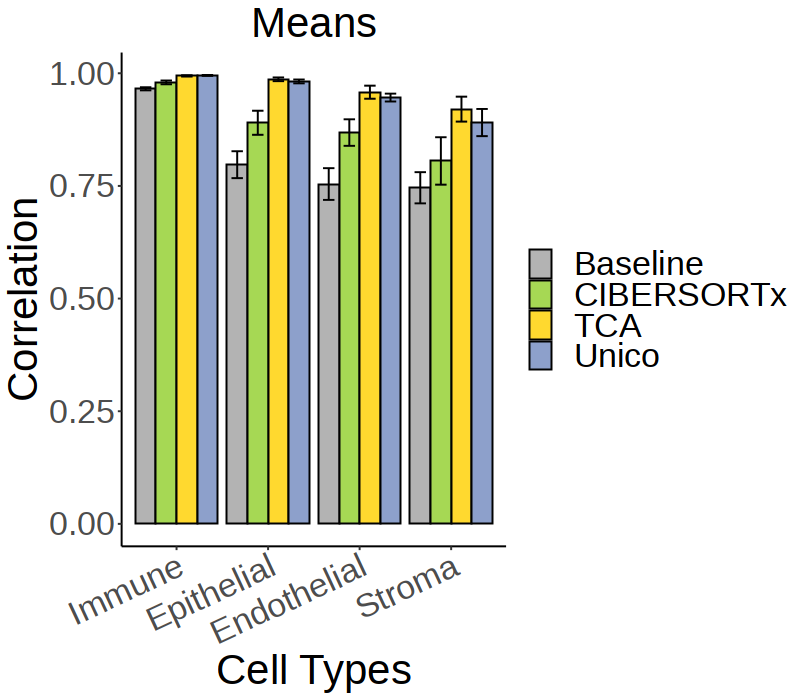

In [17]:
mean.bar.g = ggplot(mean.barplot.df, aes(x=as.factor(source), y=mean, fill=method)) +
             geom_bar(position=position_dodge(.9), stat="identity", colour='black') + 
             scale_fill_manual(values = c(base.color, cibersortx.color , tca.color, bMIND_rp.color, bMIND_sc.color, tcax.color)) + 
             geom_errorbar(aes(ymin = lb_sd, ymax= ub_sd), width=.5, position=position_dodge(.9)) +                                                
             ggtitle("Means") + 
             xlab(paste0("Cell Types")) + 
             ylab(paste0("Correlation")) + 
             theme_classic() + 
             theme(plot.title = element_text(hjust = 0.5, size = title.size)) +
             #text size
             theme(text=element_text(size=lab.size)) + 
             #rotate
             theme(axis.text.x = element_text(angle = 25, vjust = 1, hjust = 1))+
             theme(legend.title = element_blank()) 

options(repr.plot.width = 8, repr.plot.height = 7, repr.plot.res = 100)
mean.bar.g

# parameters: variance barplots

In [12]:
#keys are the method
#per key a matrix, rows are the runs
var.corrs.list = list(
    Baseline   = concat_2_keys(base.mdl.list,       key1 ="moment.recon.corrs", key2 = "var.rob.corrs"),                
    CIBERSORTx = concat_2_keys(cibersortx.mdl.list, key1 ="moment.recon.corrs", key2 = "var.rob.corrs"),                    
    TCA        = concat_2_keys(tca.mdl.list,        key1 ="moment.hat.corrs",   key2 = "var.rob.corrs"),                     
    TCAx       = concat_2_keys(tcax.mdl.list,       key1 ="moment.hat.corrs",   key2 = "var.rob.corrs")
)

var.barplot.df = data.frame(
    method = as.vector(vapply(1:length(methods), function(a) rep(methods[a], k), character(k))),
    source = as.vector(rep(source.ids, length(methods))),
    mean   = as.vector(vapply(1:length(methods), function(a) colMeans(var.corrs.list[[methods[a]]]), numeric(k))),
    lb_sd  = as.vector(vapply(1:length(methods), function(a) colMeans(var.corrs.list[[methods[a]]]) - colSds(var.corrs.list[[methods[a]]]),    numeric(k))),
    ub_sd  = as.vector(vapply(1:length(methods), function(a) colMeans(var.corrs.list[[methods[a]]]) + colSds(var.corrs.list[[methods[a]]]),    numeric(k)))
)

# set some to factors so that the figures respect the order 
var.barplot.df$source = factor(var.barplot.df$source, levels = source.ids)
var.barplot.df$method = factor(var.barplot.df$method, levels = methods)   
levels(var.barplot.df$method)[match("TCAx",levels(var.barplot.df$method))] <- "Unico"

In [13]:
var.barplot.df

method     source      mean       lb_sd       ub_sd    
1  Baseline   Immune      0.72975452  0.69671937 0.7627897
2  Baseline   Epithelial  0.51544738  0.46082038 0.5700744
3  Baseline   Endothelial 0.53245218  0.46722773 0.5976766
4  Baseline   Stroma      0.54004703  0.47662878 0.6034653
5  CIBERSORTx Immune      0.84135778  0.81457214 0.8681434
6  CIBERSORTx Epithelial  0.50994123  0.41980778 0.6000747
7  CIBERSORTx Endothelial 0.02089085 -0.07253586 0.1143175
8  CIBERSORTx Stroma      0.09122570 -0.04126066 0.2237121
9  TCA        Immune      0.72416529  0.67826462 0.7700660
10 TCA        Epithelial  0.73178410  0.69053258 0.7730356
11 TCA        Endothelial 0.67364893  0.62446438 0.7228335
12 TCA        Stroma      0.60454428  0.53116461 0.6779239
13 Unico      Immune      0.89777269  0.88386106 0.9116843
14 Unico      Epithelial  0.72160708  0.68890560 0.7543086
15 Unico      Endothelial 0.59759838  0.55483173 0.6403650
16 Unico      Stroma      0.39898350  0.31926966 0.4786973

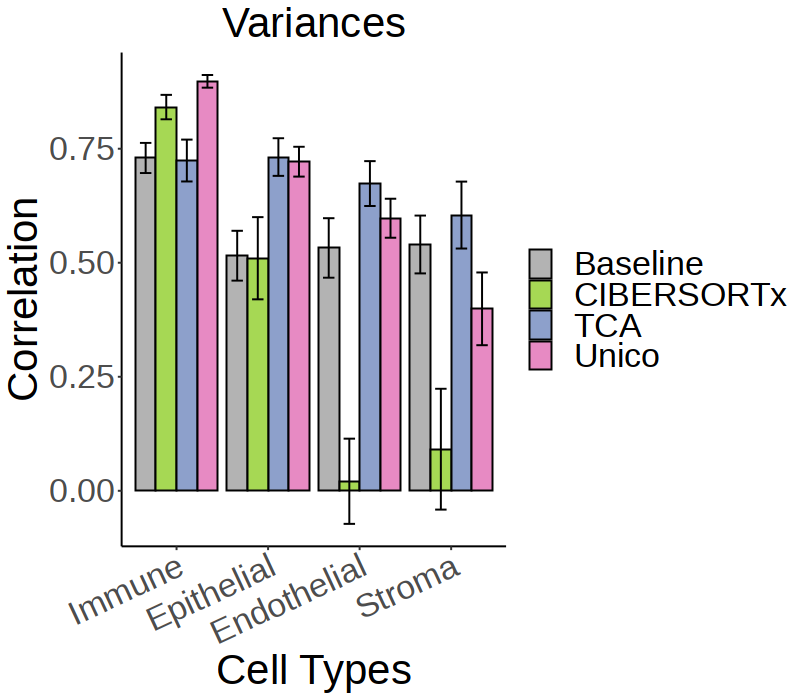

In [14]:
var.bar.g = ggplot(var.barplot.df, aes(x=as.factor(source), y=mean, fill=method)) +
            geom_bar(position=position_dodge(.9), stat="identity", colour='black') + scale_fill_manual(values = c(base.color, cibersortx.color , tca.color, tcax.color)) + 
            geom_errorbar(aes(ymin = lb_sd, ymax= ub_sd), width=.5, position=position_dodge(.9)) +                                                
            ggtitle("Variances") + 
            xlab(paste0("Cell Types")) + 
            ylab(paste0("Correlation")) + 
            theme_classic() + 
            theme(plot.title = element_text(hjust = 0.5, size = title.size)) +
            #text size
            theme(text=element_text(size=lab.size)) + 
            #rotate
            theme(axis.text.x = element_text(angle = 25, vjust = 1, hjust = 1))+
            theme(legend.title = element_blank()) 

options(repr.plot.width = 8, repr.plot.height = 7, repr.plot.res = 100)
var.bar.g

# parameters: covariance barplots

In [15]:
#keys are the method
#per key a matrix, rows are the runs
covar.corrs.list = list(
    Baseline       = concat_2_keys(base.mdl.list,   key1 ="moment.recon.corrs", key2 = "covar.rob.corrs"),                
    CIBERSORTx = concat_2_keys(cibersortx.mdl.list, key1 ="moment.recon.corrs", key2 = "covar.rob.corrs"),                    
    TCA        = concat_2_keys(tca.mdl.list,        key1 ="moment.recon.corrs", key2 = "covar.rob.corrs"),                     
    TCAx       = concat_2_keys(tcax.mdl.list,       key1 ="moment.hat.corrs", key2 = "covar.rob.corrs")
)
covar.ids = colnames(covar.corrs.list[[1]])


covar.barplot.df = data.frame(
    method = as.vector(vapply(1:length(methods), function(a) rep(methods[a], length(covar.ids)), character(length(covar.ids)))),
    source = as.vector(rep(covar.ids, length(methods))),
    mean   = as.vector(vapply(1:length(methods), function(a) colMeans(covar.corrs.list[[methods[a]]]), numeric(length(covar.ids)))),
    lb_sd  = as.vector(vapply(1:length(methods), function(a) colMeans(covar.corrs.list[[methods[a]]]) - colSds(covar.corrs.list[[methods[a]]]),    numeric(length(covar.ids)))),
    ub_sd  = as.vector(vapply(1:length(methods), function(a) colMeans(covar.corrs.list[[methods[a]]]) + colSds(covar.corrs.list[[methods[a]]]),    numeric(length(covar.ids))))
)

# extract top TCA perform
covar.ids = covar.ids[order(-covar.barplot.df[covar.barplot.df["method"] == "TCA","mean"])]
                       
# set some to factors so that the figures respect the order 
covar.barplot.df$source = factor(covar.barplot.df$source, levels = covar.ids)
covar.barplot.df$method = factor(covar.barplot.df$method, levels = methods)
levels(covar.barplot.df$method)[match("TCAx",levels(covar.barplot.df$method))] <- "Unico"

In [16]:
covar.barplot.df

method     source                 mean        lb_sd      ub_sd        
1  Baseline   Immune-Epithelial      -0.42795961 -0.4903330 -0.3655861717
2  Baseline   Immune-Endothelial      0.50303867  0.3824162  0.6236611724
3  Baseline   Immune-Stroma           0.39671307  0.3325320  0.4608941521
4  Baseline   Epithelial-Endothelial -0.13876265 -0.2776502  0.0001249425
5  Baseline   Epithelial-Stroma       0.01020453 -0.1922625  0.2126715078
6  Baseline   Endothelial-Stroma      0.59931435  0.5522392  0.6463895244
7  CIBERSORTx Immune-Epithelial       0.30963914  0.2011454  0.4181329212
8  CIBERSORTx Immune-Endothelial      0.00000000  0.0000000  0.0000000000
9  CIBERSORTx Immune-Stroma           0.00000000  0.0000000  0.0000000000
10 CIBERSORTx Epithelial-Endothelial  0.00000000  0.0000000  0.0000000000
11 CIBERSORTx Epithelial-Stroma       0.00000000  0.0000000  0.0000000000
12 CIBERSORTx Endothelial-Stroma      0.00000000  0.0000000  0.0000000000
13 TCA        Immune-Epithelial       0.33270430  0.1850648  0.4803437570
14 TCA        Immune-Endothelial      0.42051631  0.3169073  0.5241253011
15 TCA        Immune-Stroma           0.29764634  0.2244924  0.3708003197
16 TCA        Epithelial-Endothelial  0.48214608  0.4110552  0.5532369390
17 TCA        Epithelial-Stroma       0.44263479  0.3836473  0.5016223086
18 TCA        Endothelial-Stroma      0.46222008  0.3819726  0.5424675562
19 Unico      Immune-Epithelial       0.69554756  0.6525796  0.7385154785
20 Unico      Immune-Endothelial      0.65378584  0.6233061  0.6842656171
21 Unico      Immune-Stroma           0.43074460  0.3524537  0.5090355396
22 Unico      Epithelial-Endothelial  0.63273158  0.5856689  0.6797942630
23 Unico      Epithelial-Stroma       0.39539357  0.3379668  0.4528203175
24 Unico      Endothelial-Stroma      0.41721402  0.3633406  0.4710874789

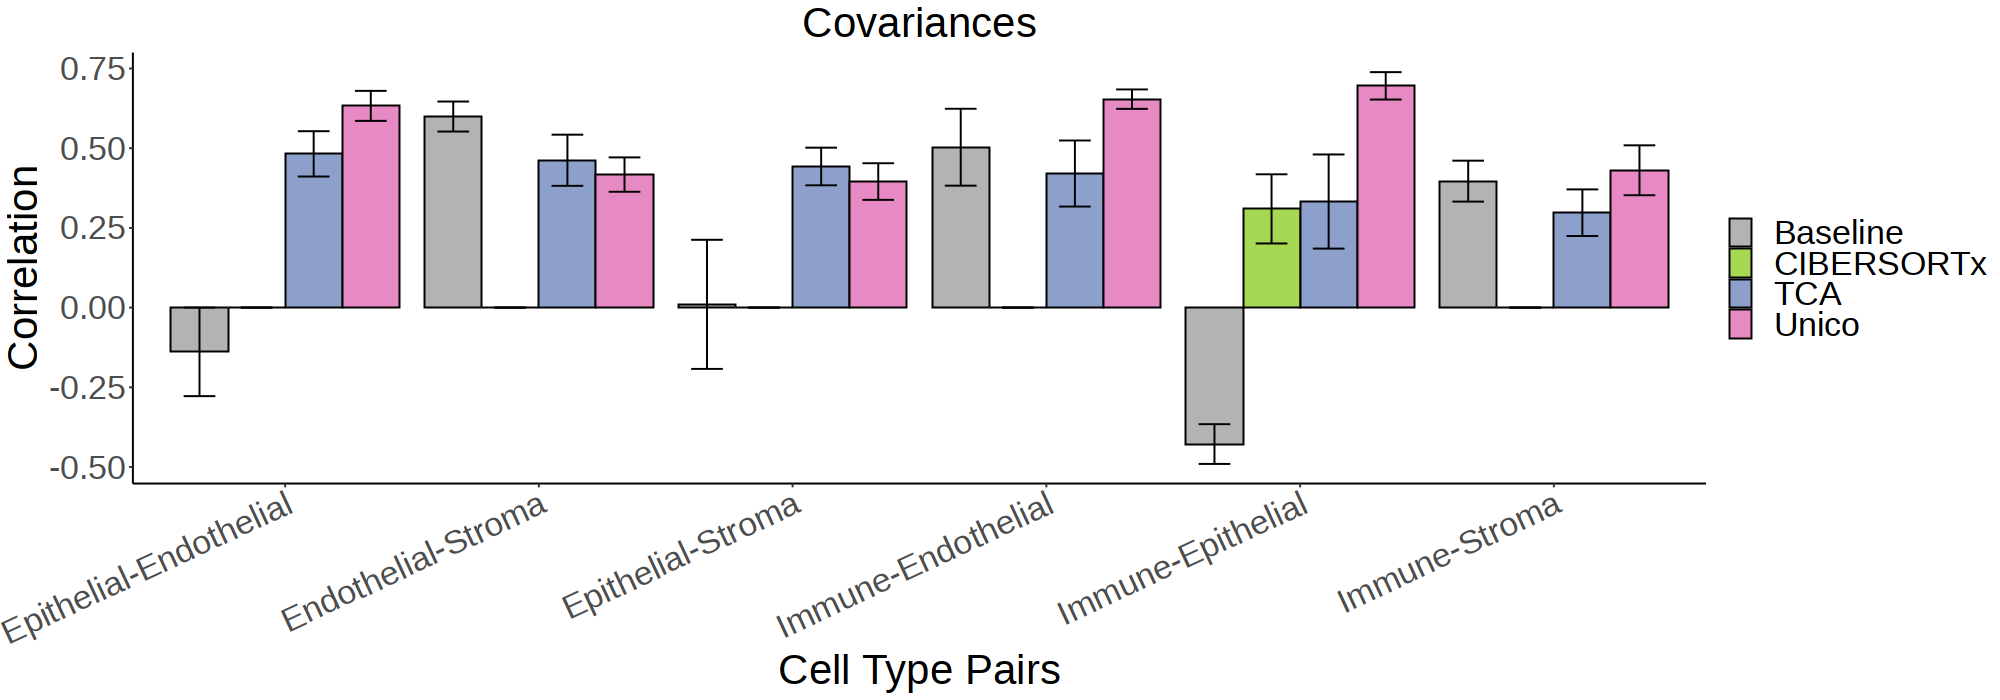

In [17]:
covar.bar.g = ggplot(covar.barplot.df, aes(x=as.factor(source), y=mean, fill=method)) +
              geom_bar(position=position_dodge(.9), stat="identity", colour='black') + scale_fill_manual(values = c(base.color, cibersortx.color , tca.color, tcax.color)) + 
              geom_errorbar(aes(ymin = lb_sd, ymax= ub_sd), width=.5, position=position_dodge(.9)) +                                                
        
              ggtitle("Covariances") + 
              xlab(paste0("Cell Type Pairs")) + 
              ylab(paste0("Correlation")) + 
              theme_classic() + 
              theme(plot.title = element_text(hjust = 0.5, size = title.size)) +
              #text size
              theme(text=element_text(size=lab.size)) + 
              #rotate
              theme(axis.text.x = element_text(angle = 25, vjust = 1, hjust = 1))+
              theme(legend.title = element_blank()) 

options(repr.plot.width = 20, repr.plot.height = 7, repr.plot.res = 100)
covar.bar.g

# barplots

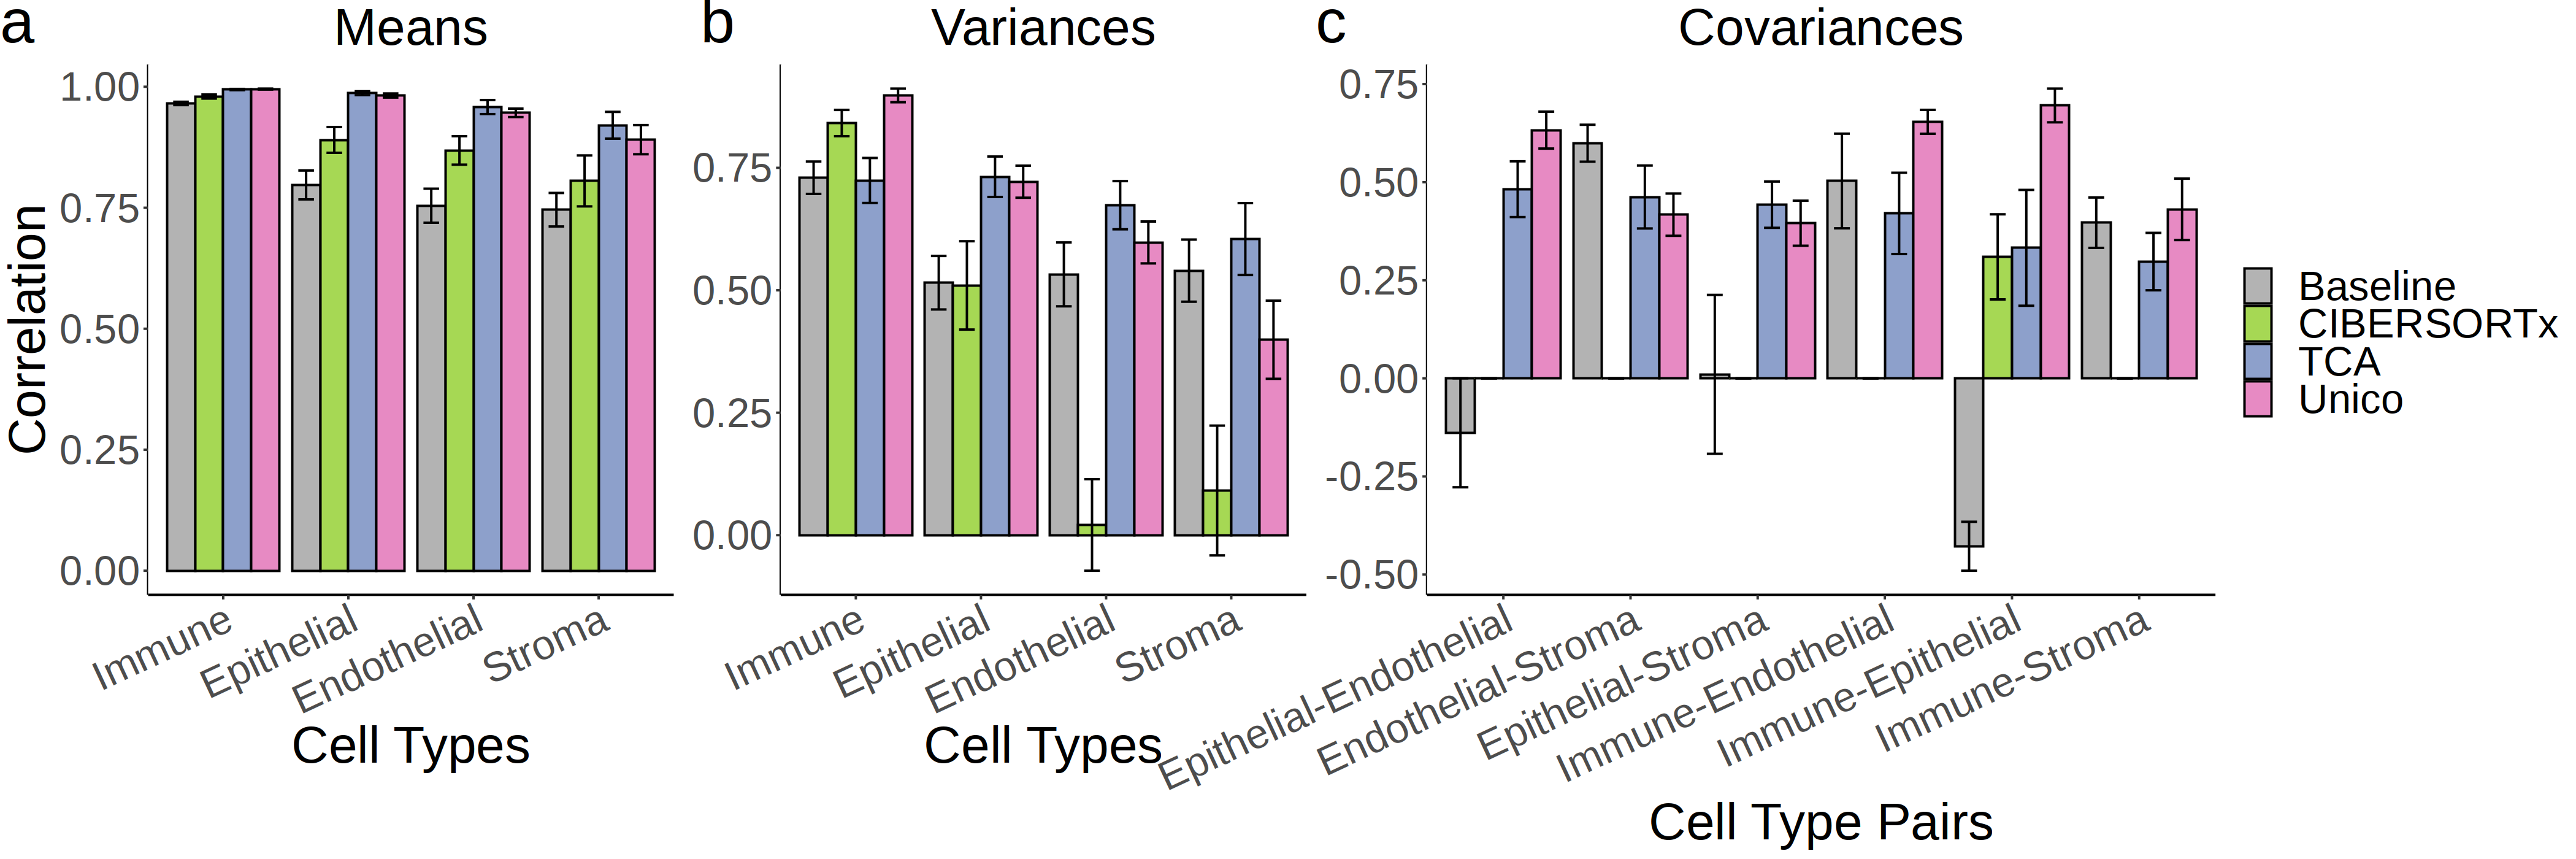

In [18]:
plts = list(3)
plts[[1]] = mean.bar.g + theme(legend.position="none") 
plts[[2]] = var.bar.g + theme(legend.position="none") + theme(axis.title.y = element_blank()) + theme(legend.text = element_text(size=legend.size)) 
plts[[3]] = covar.bar.g + theme(axis.title.y = element_blank()) 

covar.width   = round(2 * length(covar.ids)/length(source.ids))
figure.width  = (4 + covar.width) * 3
figure.height = 7 

options(repr.plot.width = figure.width, repr.plot.height = figure.height, repr.plot.res = 200)

params.bar.g = egg::ggarrange(plots=list(plts[[1]], plts[[2]], plts[[3]]),  
                   labels = c("a", " b", "c"), 
                   align = "h",
                   widths = c(2,2,covar.width),  
                   label.args = list(gp = grid::gpar(font = 20, cex =3)), 
                   debug=F)


# pdf(file.path(figure.dir,paste0("RNA_Simulation-Lung_", source.col, "_params.bar.pdf")),
#     width = figure.width, height = figure.height,  onefile=FALSE)
# g
# dev.off()

# box plot

### step1: prepare the boxplot needed correlation 

In [19]:
for (t in ts){
    sim.data.list[[t]]$eval.feature.source = calc_variable_feature_source(sim.data.list[[t]]$Z.scale, 
                                                                          variable_thr = 0.1, max_sds = max_stds)
    
    #sim.data.list[[t]]$eval.entropies = sim.data.list[[t]]$params$entropies <= sim.data.list[[t]]$data.gen.params$entropy.thr
    # arbitray cut to low and high entropy group
    sim.data.list[[t]]$eval.entropies = sim.data.list[[t]]$params$entropies <= median(sim.data.list[[t]]$params$entropies)
    sim.data.list[[t]]$eval.entropies = as.matrix(vapply(1:m, function(j) if (sim.data.list[[t]]$eval.entropies[j]) "Low Entropy" else "High Entropy", character(1)))
}

Z.corrs.list = list(
    #m*t by k 
    Baseline       = concat_key(base.mdl.list,       key = "Z.corrs"),                
    CIBERSORTx     = concat_key(cibersortx.mdl.list, key = "Z.corrs"),                    
    TCA            = concat_key(tca.mdl.list,        key = "Z.corrs"),                     
    TCAx           = concat_key(tcax.mdl.list,       key = "Z.corrs"),
    mask           = concat_key(sim.data.list,       key = "eval.feature.source"),
    #m*t by 1
    eval.entropies = concat_key(sim.data.list,       key = "eval.entropies")
)

In [20]:
median(sim.data.list[[t]]$params$entropies)

[1] 1.272944

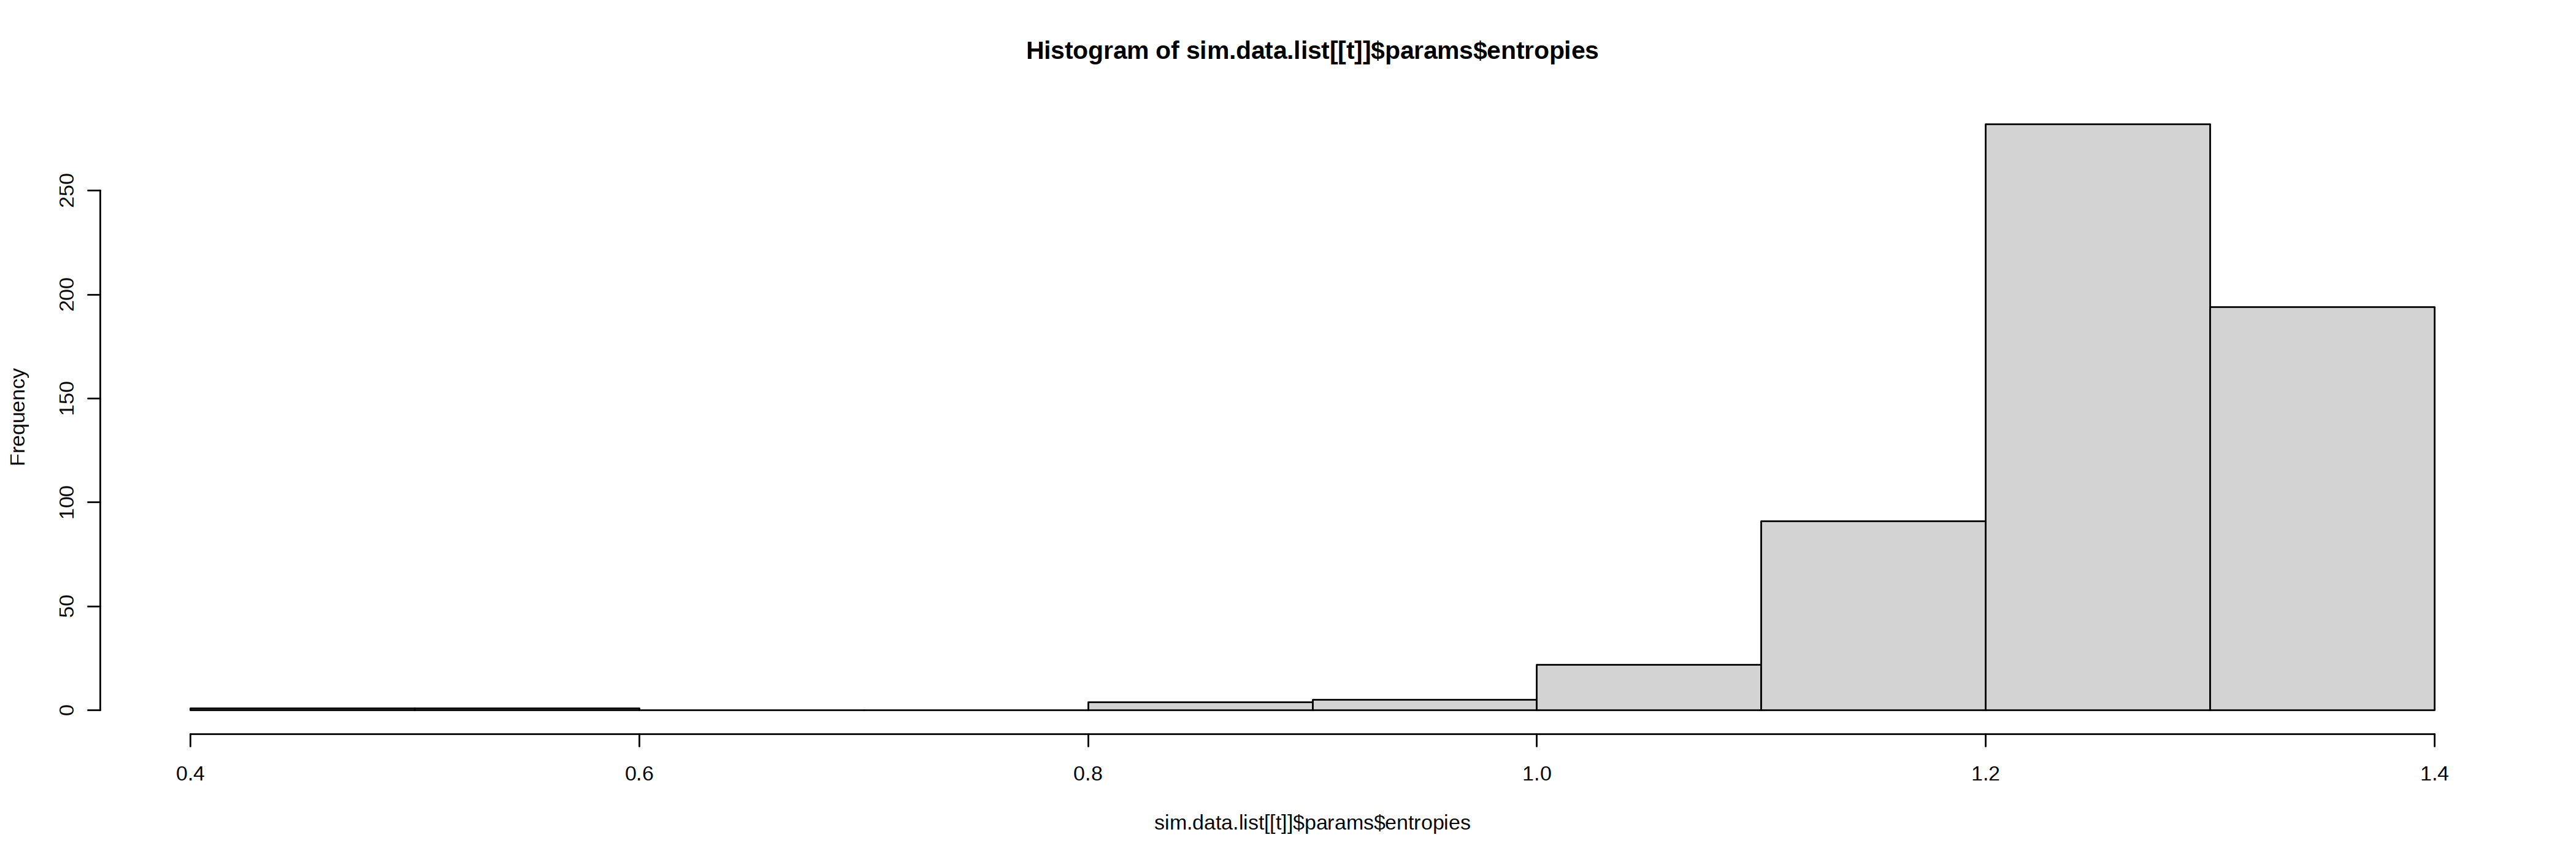

In [21]:
hist(sim.data.list[[t]]$params$entropies)

In [22]:
table(sim.data.list[[t]]$eval.entropies)


High Entropy  Low Entropy 
         300          300 

### step2: prepare p-vals related

In [23]:
boxplot.meta = list()
for (source.id in source.ids){
    
    median.mat       = matrix(0, 2, length(methods))
    rownames(median.mat) = c("High Entropy", "Low Entropy")
    colnames(median.mat) = methods
    
    whitney.pval.mat = copy(median.mat)
    binom.pval.mat   = copy(median.mat)
    n.success.mat    = copy(median.mat)
    p.success.mat    = copy(median.mat)
    
    for (entropy in c("High Entropy" ,"Low Entropy")){
        
        # selected gene in the ideal entropy group and deemed to be evaluated 
        keep.mask = (Z.corrs.list$eval.entropies == entropy) & Z.corrs.list$mask[,source.id]
        
        for (method in methods){
            method.corrs = Z.corrs.list[[method]][keep.mask, source.id]
            tcax.corrs   = Z.corrs.list[["TCAx"]][keep.mask, source.id]
            
            #paired one side non-parametric whitney test
            median.mat[entropy, method] = median(method.corrs)
            res = wilcox.test(x = tcax.corrs, 
                              y = method.corrs, 
                              alternative = "g", paired = T) # x > y one side test 
            whitney.pval.mat[entropy,method] = res$p.value
            
            #binomial test
            n_s = sum(tcax.corrs > method.corrs)   
            #n_s = length(which(tcax.corrs > method.corrs))
            n   = sum(keep.mask)
            res = binom.test(x = n_s, n = n, p = 0.5, alternative = c("greater"))
            binom.pval.mat[entropy,method] = res$p.value
            n.success.mat[entropy,method]  = n_s
            p.success.mat[entropy,method]  = n_s/n
            
        }
        boxplot.meta[[source.id]] = list(median.mat       = median.mat,
                                         whitney.pval.mat = whitney.pval.mat,
                                         binom.pval.mat   = binom.pval.mat,
                                         n.success.mat    = n.success.mat,
                                         p.success.mat    = p.success.mat)
    }
}
#saveRDS(boxplot.meta, file.path(fig.dir,"boxplot.meta.rds"))

Warning message in wilcox.test.default(x = tcax.corrs, y = method.corrs, alternative = "g", :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(x = tcax.corrs, y = method.corrs, alternative = "g", :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(x = tcax.corrs, y = method.corrs, alternative = "g", :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(x = tcax.corrs, y = method.corrs, alternative = "g", :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(x = tcax.corrs, y = method.corrs, alternative = "g", :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(x = tcax.corrs, y = method.corrs, alternative = "g", :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(x = tcax.corrs, y = method.corrs, alternative = "g", :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(x 

In [24]:
str(boxplot.meta)

List of 4
 $ Immune     :List of 5
  ..$ median.mat      : num [1:2, 1:4] 0.632 0.68 0.838 0.882 0.841 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "High Entropy" "Low Entropy"
  .. .. ..$ : chr [1:4] "Baseline" "CIBERSORTx" "TCA" "TCAx"
  ..$ whitney.pval.mat: num [1:2, 1:4] 0.00 0.00 0.00 0.00 5.17e-263 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "High Entropy" "Low Entropy"
  .. .. ..$ : chr [1:4] "Baseline" "CIBERSORTx" "TCA" "TCAx"
  ..$ binom.pval.mat  : num [1:2, 1:4] 0.00 0.00 0.00 0.00 3.37e-259 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "High Entropy" "Low Entropy"
  .. .. ..$ : chr [1:4] "Baseline" "CIBERSORTx" "TCA" "TCAx"
  ..$ n.success.mat   : num [1:2, 1:4] 4190 5205 3761 4308 3221 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "High Entropy" "Low Entropy"
  .. .. ..$ : chr [1:4] "Baseline" "CIBERSORTx" "TCA" "TCAx"
  ..$ p.success.mat   : num [1:2, 1:4] 0.985 0.995 0.884 0.823 0.75

### step3: set some fontsize 

In [25]:
if (source.col == "decon.L1"){
    sub.titles = source.ids
}else{
    sub.titles = source.ids
}

print(source.ids)
print(sub.titles)

h.loc = c(0.66, 0.89, 1.12, 1.34)
v.loc = c(1.0, 1.1, 1.2)
v.size = 0.02
p.size = 6
under.flow = "< 1e-300"

[1] "Immune"      "Epithelial"  "Endothelial" "Stroma"     
[1] "Immune"      "Epithelial"  "Endothelial" "Stroma"     


In [26]:
W = concat_key(sim.data.list, "W")
plts <- vector(mode = "list", length = k)
m.m = nrow(Z.corrs.list$eval.entropies)
for (h in 1:k){
    Z.boxplot.df <- data.frame(cor     = as.vector(vapply(1:length(methods), function(a) Z.corrs.list[[methods[a]]][,h],   numeric(m.m))),
                               mask    = as.vector(vapply(1:length(methods), function(a) Z.corrs.list[["mask"]][,h],       logical(m.m))),
                               entropy = as.vector(vapply(1:length(methods), function(a) Z.corrs.list[["eval.entropies"]], character(m.m))),
                               method  = as.vector(vapply(1:length(methods), function(a) rep(methods[a], m.m),             character(m.m))))
    # set some to factors so that the figures respect the order                                                     
    Z.boxplot.df$method  = factor(Z.boxplot.df$method,  levels = methods) 
    Z.boxplot.df$entropy = factor(Z.boxplot.df$entropy, levels = c("High Entropy", "Low Entropy"))
    levels(Z.boxplot.df$method)[match("TCAx",levels(Z.boxplot.df$method))] <- "Unico"
                                                          
    #keep only those gene-celltype that has evaluation turned on 
    Z.boxplot.df = Z.boxplot.df[Z.boxplot.df$mask, ]
    print(dim(Z.boxplot.df))                                                 
                                                     
    plts[[h]] <- ggplot(Z.boxplot.df, aes(x = entropy, y=cor)) +
                 geom_boxplot(aes(fill = method), position = position_dodge(0.9))+    
                 scale_fill_manual (values = c(base.color, cibersortx.color, tca.color, tcax.color)) +
                 scale_color_manual(values = c(base.color, cibersortx.color, tca.color, tcax.color)) +
                                                                 
                 
                 theme_classic() + 
                 coord_cartesian(xlim = NULL, ylim = c(0,1.2)) +                           
                 ggtitle(paste0(sub.titles[h], " (", round(mean(W[,h]) * 100), "%)")) + 
                 theme(plot.title = element_text(hjust = 0.5, size = title.size)) +
                 xlab(paste0(" "))+                                    
                 ylab(paste0("Correlation"))+
                 scale_y_continuous(breaks=c(0, 0.2, 0.4, 0.6, 0.8, 1.0)) + 
                 theme(text=element_text(size=lab.size))  + 
                 theme(legend.title = element_blank())
                                                     
    #adding p-vales
    whitney.pval.mat = formatC(boxplot.meta[[h]]$whitney.pval.mat, format = "e", digits = 1) 
    whitney.pval.mat[which(whitney.pval.mat == "0.0e+00")] = under.flow
          
    df1 <- data.frame(a = c(h.loc[1],h.loc[1], h.loc[4], h.loc[4]), b = c(v.loc[1]-v.size, v.loc[1], v.loc[1], v.loc[1]-v.size))
    df2 <- data.frame(a = c(h.loc[2],h.loc[2], h.loc[4], h.loc[4]), b = c(v.loc[2]-v.size, v.loc[2], v.loc[2], v.loc[2]-v.size))
    df3 <- data.frame(a = c(h.loc[3],h.loc[3], h.loc[4], h.loc[4]), b = c(v.loc[3]-v.size, v.loc[3], v.loc[3], v.loc[3]-v.size))


    df4 <- data.frame(a = 1 + c(h.loc[1],h.loc[1], h.loc[4], h.loc[4]), b = c(v.loc[1]-v.size, v.loc[1], v.loc[1], v.loc[1]-v.size))
    df5 <- data.frame(a = 1 + c(h.loc[2],h.loc[2], h.loc[4], h.loc[4]), b = c(v.loc[2]-v.size, v.loc[2], v.loc[2], v.loc[2]-v.size))
    df6 <- data.frame(a = 1 + c(h.loc[3],h.loc[3], h.loc[4], h.loc[4]), b = c(v.loc[3]-v.size, v.loc[3], v.loc[3], v.loc[3]-v.size))

    plts[[h]] <- plts[[h]] + geom_line(data = df1, aes(x = a, y = b)) + annotate("text", x = (h.loc[1]+ h.loc[4])/2,   y = v.loc[1] + 2*v.size, label = whitney.pval.mat[1,1], size = p.size) +
                             geom_line(data = df2, aes(x = a, y = b)) + annotate("text", x = (h.loc[2]+ h.loc[4])/2,   y = v.loc[2] + 2*v.size, label = whitney.pval.mat[1,2], size = p.size) +
                             geom_line(data = df3, aes(x = a, y = b)) + annotate("text", x = (h.loc[3]+ h.loc[4])/2,   y = v.loc[3] + 2*v.size, label = whitney.pval.mat[1,3], size = p.size) +
                             geom_line(data = df4, aes(x = a, y = b)) + annotate("text", x = 1+(h.loc[1]+ h.loc[4])/2, y = v.loc[1] + 2*v.size, label = whitney.pval.mat[2,1], size = p.size) +
                             geom_line(data = df5, aes(x = a, y = b)) + annotate("text", x = 1+(h.loc[2]+ h.loc[4])/2, y = v.loc[2] + 2*v.size, label = whitney.pval.mat[2,2], size = p.size) +
                             geom_line(data = df6, aes(x = a, y = b)) + annotate("text", x = 1+(h.loc[3]+ h.loc[4])/2, y = v.loc[3] + 2*v.size, label = whitney.pval.mat[2,3], size = p.size) 
                         
    # legend
    if (h != ceil(k/2)){
        plts[[h]] = plts[[h]]  + theme(legend.position="none") 
    }else{
        plts[[h]] = plts[[h]]  + theme(legend.text = element_text(size=legend.size)) 
    }       
                                                          
    plts[[h]] = plts[[h]] +  labs(tag = " ")                                                    
}


[1] 37944     4
[1] 41000     4
[1] 41376     4
[1] 41984     4


In [27]:
Z.boxplot.df

cor          mask entropy      method  
1      0.051602746 TRUE Low Entropy  Baseline
2      0.100604499 TRUE High Entropy Baseline
3     -0.071561438 TRUE Low Entropy  Baseline
4      0.084045109 TRUE High Entropy Baseline
5      0.095551343 TRUE Low Entropy  Baseline
6      0.027191151 TRUE Low Entropy  Baseline
7     -0.022033118 TRUE Low Entropy  Baseline
8      0.210636494 TRUE Low Entropy  Baseline
9      0.088095533 TRUE Low Entropy  Baseline
10     0.078868753 TRUE High Entropy Baseline
12    -0.003586759 TRUE Low Entropy  Baseline
13     0.126417750 TRUE High Entropy Baseline
14     0.024758529 TRUE High Entropy Baseline
15    -0.008679216 TRUE High Entropy Baseline
16     0.000000000 TRUE High Entropy Baseline
17     0.044523994 TRUE Low Entropy  Baseline
18     0.124258022 TRUE Low Entropy  Baseline
19     0.071124285 TRUE Low Entropy  Baseline
20     0.065412045 TRUE High Entropy Baseline
21     0.144569461 TRUE Low Entropy  Baseline
23    -0.008903908 TRUE High Entropy Baseline
24     0.075852393 TRUE High Entropy Baseline
27     0.140245255 TRUE Low Entropy  Baseline
28     0.130494283 TRUE High Entropy Baseline
30     0.103481780 TRUE High Entropy Baseline
32     0.253132055 TRUE Low Entropy  Baseline
34     0.114361783 TRUE Low Entropy  Baseline
35    -0.014345925 TRUE High Entropy Baseline
37     0.138834374 TRUE High Entropy Baseline
38     0.040486718 TRUE Low Entropy  Baseline
⋮     ⋮            ⋮    ⋮            ⋮       
47965  0.1761361   TRUE High Entropy Unico   
47966  0.5908322   TRUE Low Entropy  Unico   
47967  0.2439765   TRUE Low Entropy  Unico   
47968  0.2334644   TRUE Low Entropy  Unico   
47970  0.3130911   TRUE High Entropy Unico   
47973  0.5670800   TRUE Low Entropy  Unico   
47975  0.3582340   TRUE Low Entropy  Unico   
47976  0.3727525   TRUE High Entropy Unico   
47977  0.4754348   TRUE Low Entropy  Unico   
47978  0.2280197   TRUE High Entropy Unico   
47979  0.3174080   TRUE Low Entropy  Unico   
47980  0.4927283   TRUE High Entropy Unico   
47981  0.3343910   TRUE Low Entropy  Unico   
47982  0.2857954   TRUE High Entropy Unico   
47983  0.3893430   TRUE Low Entropy  Unico   
47984  0.5269527   TRUE High Entropy Unico   
47985  0.3197223   TRUE Low Entropy  Unico   
47986  0.3920714   TRUE Low Entropy  Unico   
47987  0.4636215   TRUE High Entropy Unico   
47988  0.3727362   TRUE High Entropy Unico   
47989  0.3966472   TRUE High Entropy Unico   
47990 -0.2798863   TRUE Low Entropy  Unico   
47991  0.1588162   TRUE High Entropy Unico   
47993  0.1816342   TRUE Low Entropy  Unico   
47994  0.3239624   TRUE High Entropy Unico   
47995  0.4753725   TRUE High Entropy Unico   
47997  0.5754236   TRUE Low Entropy  Unico   
47998  0.5872642   TRUE Low Entropy  Unico   
47999  0.3574624   TRUE Low Entropy  Unico   
48000  0.2722581   TRUE Low Entropy  Unico

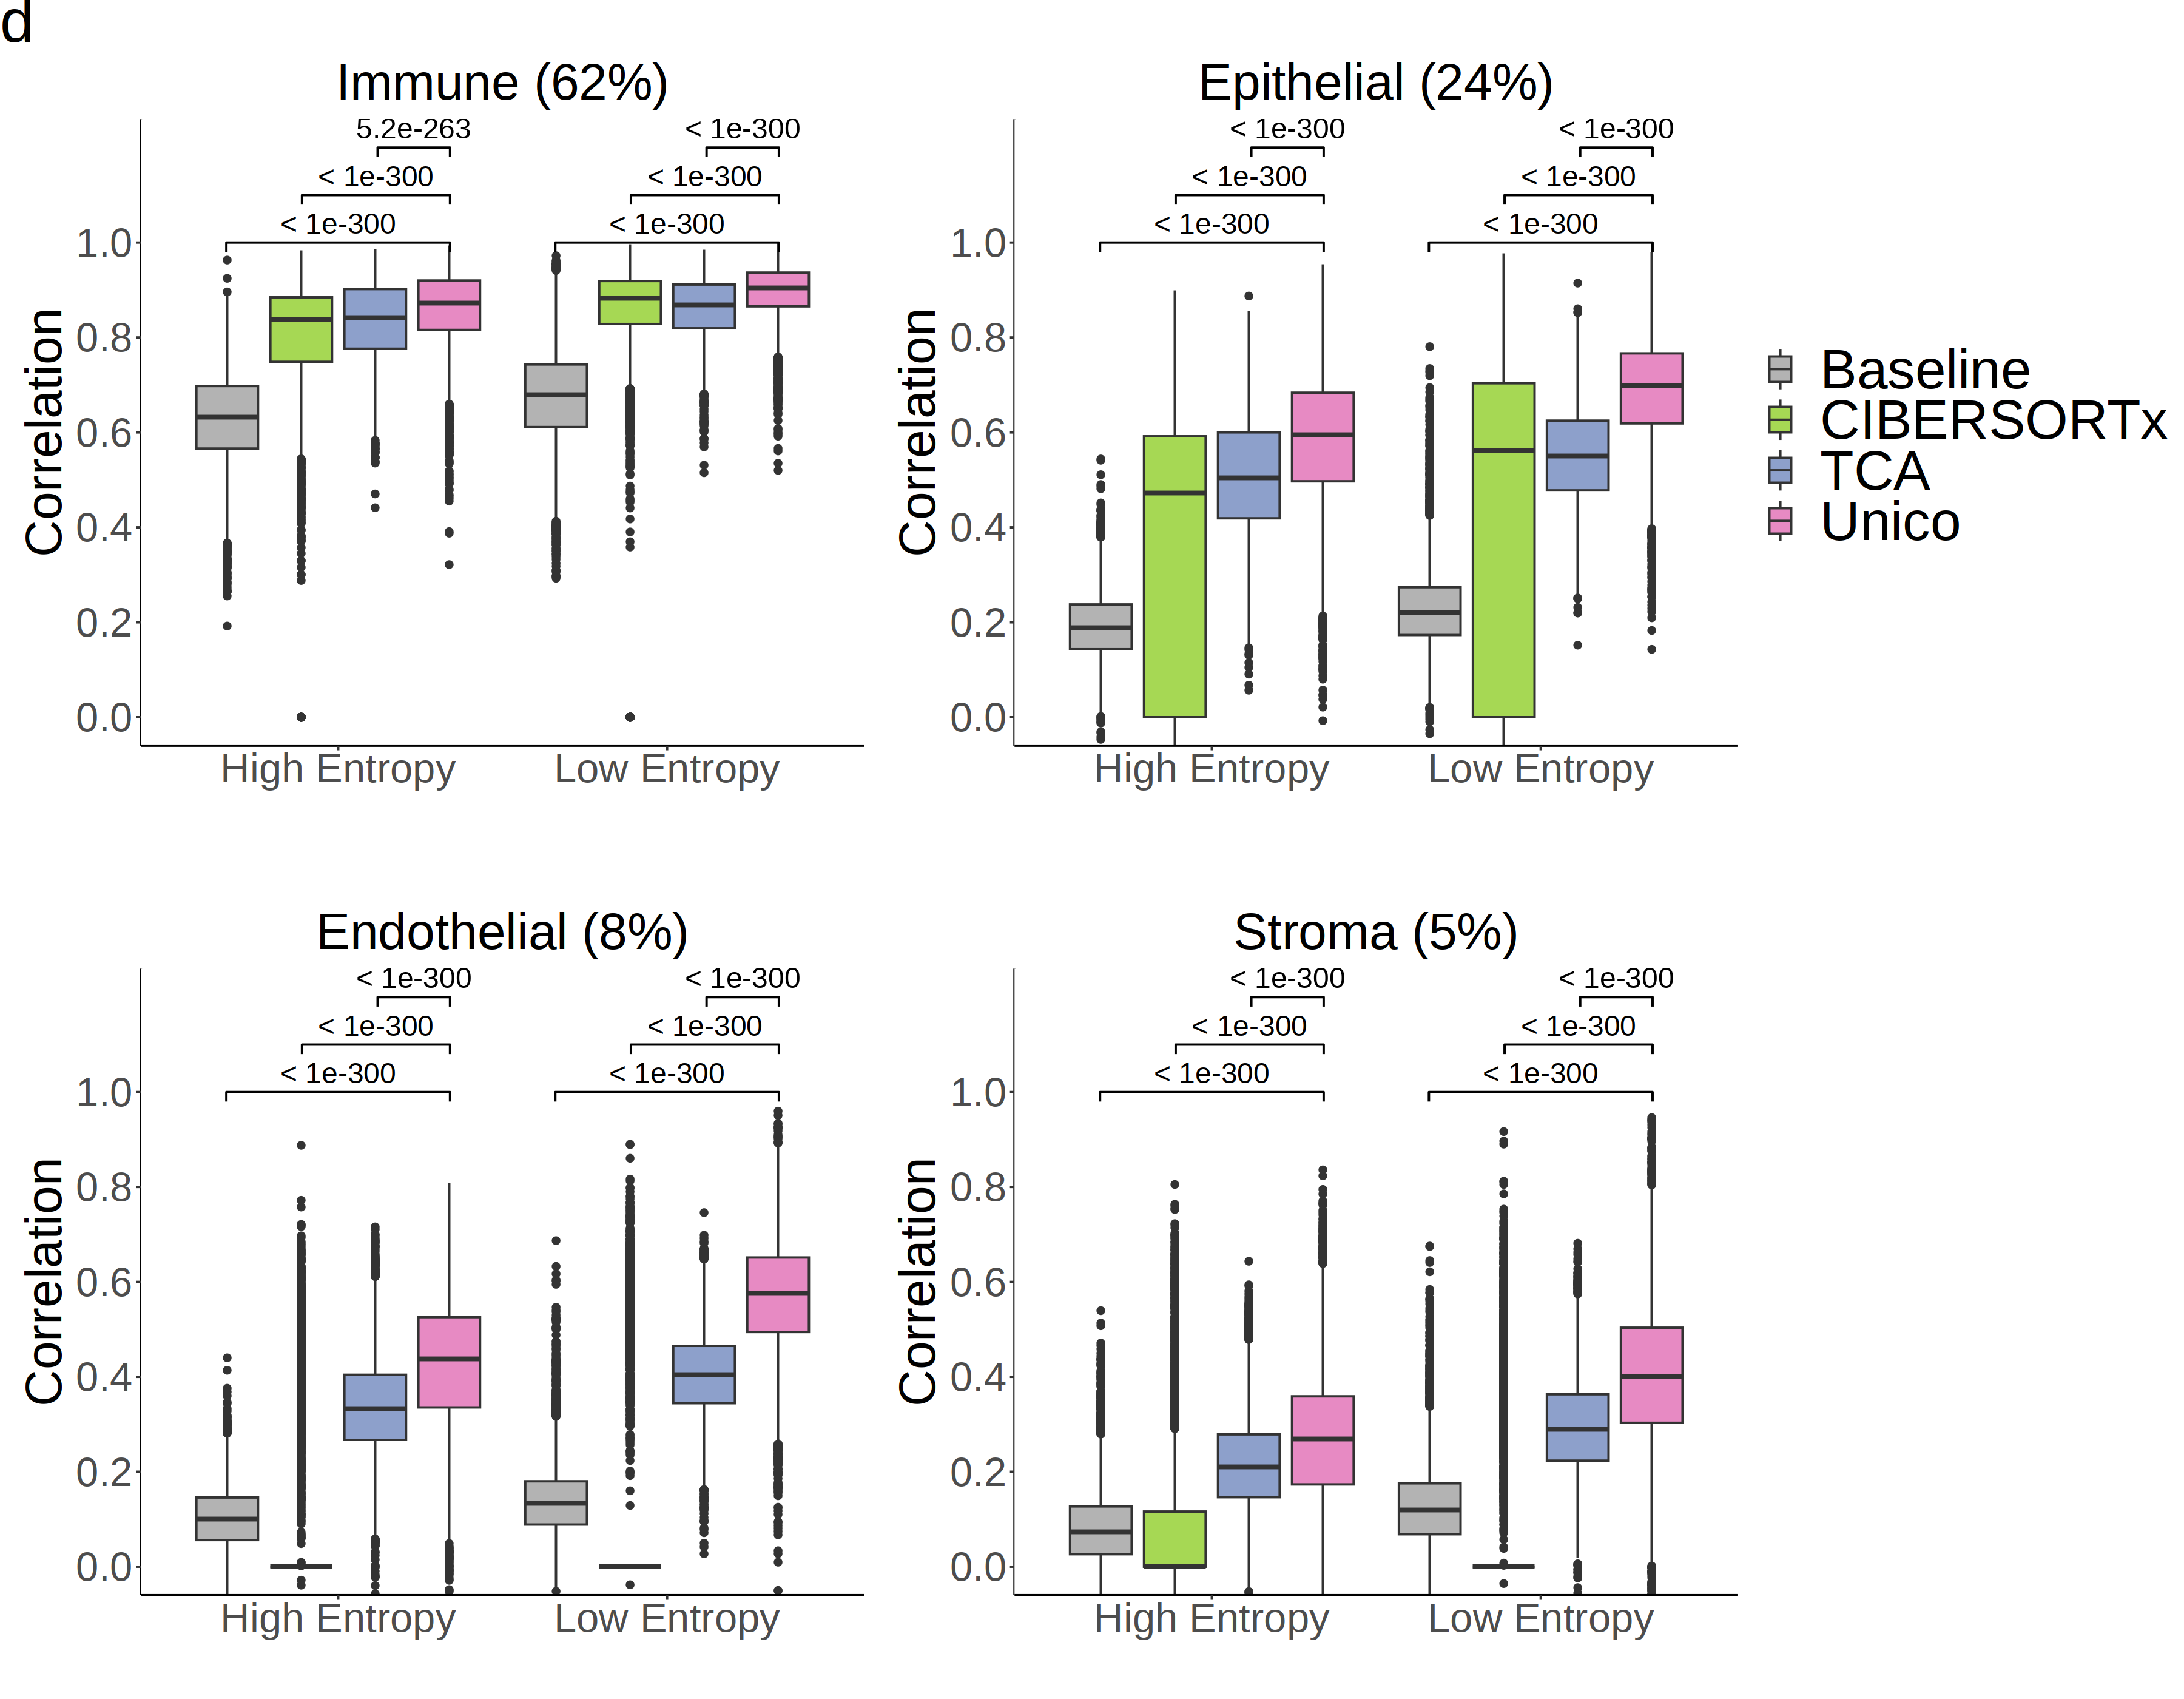

In [28]:
figure.width  = (ceil(k/2) + 1) * 6
figure.height = 2 * 6 + 2

options(repr.plot.width = figure.width, repr.plot.height = figure.height, repr.plot.res = 200)

cor.box.g = egg::ggarrange(plots = plts,
                           labels = c("d", rep("", (length(source.ids) - 1))),
                           align = "h",
                           widths = rep(2, ceil(k/2)),  
                           label.args = list(gp = grid::gpar(font = 20, cex =3)), 
                           debug=F)

# pdf(file.path(figure.dir,paste0("RNA_Simulation-Lung_", source.col, "_Z.corrs.box.pdf")),
#     width = figure.width, height = figure.height,  onefile=FALSE)
# g
# dev.off()

# Additional signal

In [29]:
# might see underflow if Z.hat has pval 1 due to not fitted, and bulk has p val whose -log10 value smaller than 300 
min.log10p.diff = -300

In [30]:
#list of matricies
#each entry is a method
joint.bulk.Z.hat.log10p.diff.list = list(
    #m*t by k 
    Baseline       = concat_key(base.mdl.list,       key = "joint.bulk.Z.hat.log10p.diff"),               
    CIBERSORTx     = concat_key(cibersortx.mdl.list, key = "joint.bulk.Z.hat.log10p.diff"),                    
    TCA            = concat_key(tca.mdl.list,        key = "joint.bulk.Z.hat.log10p.diff"),                     
    TCAx           = concat_key(tcax.mdl.list,       key = "joint.bulk.Z.hat.log10p.diff"),
    mask           = concat_key(sim.data.list,       key = "eval.feature.source"),
    #m*t by 1
    eval.entropies = concat_key(sim.data.list,       key = "eval.entropies")
)

In [31]:
#those that have too small variance are ignored
joint.bulk.Z.hat.log10p.diff.list$TCAx

Immune       Epithelial   Endothelial  Stroma       
ENSG00000184990  -3.94099795   -2.1757587 -2.31702378   -3.354894064
ENSG00000148053           NA           NA  4.28525346   -0.452662720
ENSG00000204713   9.06841121    1.6376889 -0.16942302   -1.800496941
ENSG00000157077           NA   -2.8388318  2.11383633   -2.901921673
ENSG00000007341  -0.03613022    2.7015959  0.60102730   -0.130060598
ENSG00000178585  -0.83448463    4.4694729 -0.91432096  -13.964119448
ENSG00000147383   7.70930012    1.9874236  0.86487657   -1.054923738
ENSG00000136930   2.43419492   -0.0500423  1.10011494   -2.209482511
ENSG00000139631  -9.70658522    4.0718451  1.31522884   -2.746445051
ENSG00000153446           NA   11.6692903          NA    2.246331376
ENSG00000206199           NA  -51.5236414          NA             NA
ENSG00000127666  14.26181914    0.8642545  1.38723164   -0.006797883
ENSG00000178695  12.87882781    2.9464861  2.49340682    0.354576237
ENSG00000125741   6.18561009    1.7450572  0.96914822    0.508156010
ENSG00000167642           NA    8.9697035          NA    0.159523927
ENSG00000115112 -17.38609598    4.0394803          NA    0.027687569
ENSG00000141994   3.55042842   -4.3203940 -0.65920344   -3.416288773
ENSG00000132603   8.20875753    1.4269679 -0.20084212   -3.388835706
ENSG00000149792  -5.73612528   -7.7908449 -1.37696430   -0.362000444
ENSG00000130159   0.52325402   -5.1744370 -0.73746652   -0.748910353
ENSG00000109381   4.87089249   -3.7530802 -0.84216235   -2.189056339
ENSG00000115339           NA    9.1659507          NA             NA
ENSG00000131378  -0.75908874    3.5862111  1.81597781   -2.714611518
ENSG00000134321   0.90440666    1.7582856  1.18205567    0.073165923
ENSG00000136352           NA   64.0671511          NA             NA
ENSG00000164023 -17.15494286    3.9121060          NA             NA
ENSG00000129353 -13.38172694  -11.7825179 -7.14416214   -4.854730628
ENSG00000163527   2.51869978    1.2174245 -0.05335142   -1.888190919
ENSG00000160472           NA -135.6774913          NA             NA
ENSG00000178498           NA   -2.1882875          NA    1.778162129
⋮               ⋮            ⋮            ⋮            ⋮            
ENSG00000135077 141.5389468           NA            NA           NA 
ENSG00000104450          NA    7.6250407            NA           NA 
ENSG00000219545   2.1624890   -0.6624163   -2.69416424   0.85072279 
ENSG00000101443          NA   75.6721608            NA           NA 
ENSG00000162542          NA    2.9338571            NA   0.83637409 
ENSG00000188938   3.1917942    5.5661516    0.93688108  -1.44346830 
ENSG00000174839  -5.7781087    2.7682521   -1.07848337   1.21421543 
ENSG00000090615   4.5521070    2.4085081    0.27708650  -0.12924270 
ENSG00000066379   7.1539322    1.5352943    0.54643397  -0.04512758 
ENSG00000182704          NA           NA   -0.45741407 -13.53861223 
ENSG00000075711   2.3721787    4.3132851   -0.38055312  -1.22862075 
ENSG00000165806   4.4530694    4.6834993    2.24041691   0.67650414 
ENSG00000107874  -1.8203804    2.1779969    0.78200640  -0.60779432 
ENSG00000129518  -5.1940116   -4.1866767    0.45703586  -1.67708925 
ENSG00000168958   0.2974982   -2.5456721   -1.61898743  -1.33576620 
ENSG00000171298  -2.8192149           NA    4.90836775  -0.39918215 
ENSG00000123094          NA    2.4198900   -0.01480401  -0.42588377 
ENSG00000155827   5.1095976    1.8749588    1.30503220   0.31777967 
ENSG00000126214   0.8891299    1.9088378    3.52178666   0.28117666 
ENSG00000086102   7.4202111    2.2633125    0.57638060  -9.44068387 
ENSG00000196639          NA           NA    3.94673759   0.71086640 
ENSG00000005108          NA  -10.4970153  -11.36063989           NA 
ENSG00000120029   4.1714465    3.8156218    2.07746302  -0.24228731 
ENSG00000102218  14.1677977    0.6498344    1.19596355   0.13008824 
ENSG00000165512  -4.4854978  -15.5366837   -0.97586003  -1.35722710 
ENSG00000130513          NA   -8.2744430    0.65693226           NA 
ENSG0000010540

In [32]:
plot.list = joint.bulk.Z.hat.log10p.diff.list

In [33]:
plot.list["TCA"]

$TCA
                       Immune    Epithelial   Endothelial        Stroma
ENSG00000184990  1.118372e+00 -2.175080e+00 -6.171606e+00 -1.071943e+01
ENSG00000148053            NA            NA -4.761613e+01 -1.982579e+00
ENSG00000204713  7.481594e+00 -5.607584e-01 -6.971485e+00 -3.069863e+00
ENSG00000157077            NA -2.327665e+01 -5.133335e+00 -1.257644e+01
ENSG00000007341  1.470944e+00 -1.412667e+01  1.226535e+00 -6.695876e+00
ENSG00000178585 -4.427641e+01 -4.438234e+00 -6.398685e+00 -4.057337e+00
ENSG00000147383  1.074473e+01 -1.775719e+01  3.198779e+00 -1.115059e+00
ENSG00000136930 -5.089334e+00 -8.300617e+00 -1.587951e-01 -1.568672e+01
ENSG00000139631 -2.240578e+01  2.947067e-01 -3.993827e-01 -6.374371e+00
ENSG00000153446            NA -2.243642e+01            NA -1.042828e+01
ENSG00000206199            NA -1.236076e+02            NA            NA
ENSG00000127666  1.385853e+01 -3.782081e+00 -1.441970e+00  8.812542e-01
ENSG00000178695 -2.262902e+01 -5.252523e+00  3.916726e+00 -1.371952e+00
ENSG00000125741  1.831124e+01  5.980463e+00 -8.295906e-01  2.264410e+00
ENSG00000167642            NA  7.921264e+00            NA -3.437991e+00
ENSG00000115112 -6.733824e+00 -4.446141e+00            NA  4.086149e-02
ENSG00000141994 -1.721940e+01 -3.392580e+01 -1.111265e+01 -7.927472e+00
ENSG00000132603  3.479165e+00 -3.259017e+01 -8.032842e+00 -1.908273e+01
ENSG00000149792 -5.402794e+00 -6.837253e+00 -3.775292e+00  8.012279e-01
ENSG00000130159 -3.976888e-01 -1.750123e+01 -4.202049e+00 -1.412318e+00
ENSG00000109381  2.553533e+00 -1.872910e+01 -3.231846e+00 -2.923156e+00
ENSG00000115339            NA  1.469421e+01            NA            NA
ENSG00000131378  2.742317e+00  2.182586e+00  1.011432e+00 -3.471944e+00
ENSG00000134321 -4.809168e+00 -1.406812e+01 -5.560387e+00 -3.885635e+00
ENSG00000136352            NA  8.737383e+00            NA            NA
ENSG00000164023 -3.379372e+01 -3.279274e+00            NA            NA
ENSG00000129353  1.053164e+00 -3.312982e+01 -2.049802e+01 -8.735743e+00
ENSG00000163527 -1.177421e+01  6.660382e+00 -9.222164e-01 -7.612050e+00
ENSG00000160472            NA -1.709732e+02            NA            NA
ENSG00000178498            NA -2.534576e+01            NA -1.667297e+01
ENSG00000131389 -1.938522e+00 -1.928547e+00  3.454324e+00            NA
ENSG00000166377 -1.426521e+00 -8.895670e+00 -4.484688e+00 -4.915730e+00
ENSG00000031081  1.035860e+01 -9.581160e+00 -6.300641e-01            NA
ENSG00000110841            NA -2.223454e+01 -1.922015e+01 -1.321900e+01
ENSG00000103496 -3.107195e+01  1.692144e+00 -1.302319e+00  5.402238e-02
ENSG00000154065            NA -4.012962e+01            NA            NA
ENSG00000246695  7.913545e+00  3.676191e+00 -1.260567e+01 -3.797845e+00
ENSG00000117410  1.256599e+01 -2.045752e+00 -4.312321e-01 -1.146167e+00
ENSG00000105185 -1.756731e+01 -5.079874e+00 -9.649852e-01  2.410589e+00
ENSG00000163510 -1.305617e+01 -6.436230e+00  3.170908e+00  1.989650e+00
ENSG00000007923 -7.625660e+00 -1.039493e+01  1.045169e+00 -1.133393e+00
ENSG00000103351            NA -1.716641e+01 -1.610062e+00 -3.773438e+00
ENSG00000031003 -2.451166e+00 -2.804134e+00 -7.270531e+00 -7.752864e+00
ENSG00000213983 -2.417645e+01 -2.105731e+01 -1.638411e+01 -1.321830e+00
ENSG00000152952            NA -3.128326e+00 -3.303256e+00 -4.883276e+00
ENSG00000143952 -1.777645e+01 -2.843525e-01 -8.514183e+00 -1.297192e+01
ENSG00000132952 -3.918920e+01            NA -5.318033e+00 -1.436171e+00
ENSG00000101333            NA -8.670905e+00 -2.195647e+01 -5.825412e+00
ENSG00000167515 -2.271433e+01 -1.385816e+01 -2.210322e+01 -6.200088e-01
ENSG00000185504  5.726535e+00 -1.147262e+01 -1.323394e+01 -3.685178e+00
ENSG00000071889 -8.777599e+01 -2.771562e+00 -7.044647e+00 -1.424586e+01
ENSG00000060138  5.477697e+00  4.743734e+00  2.660822e+00  3.813608e+00
ENSG00000124749            NA -5.315749e+01 -7.181640e+00 -1.232970e+01
ENSG00000204954  2.023804e+01 -1.494846e+01 -8.673999e-01 -2.756513e+00
ENSG00000159692 -1.285436e+00  9.29

In [34]:
addition.box.dfs = data.frame()
m.m = nrow(plot.list$eval.entropies)
for (h in 1:k){
    boxplot.df <- data.frame(source.id = as.vector(vapply(1:length(methods), function(a) rep(source.ids[h], m.m),       character(m.m))),
                             y         = as.vector(vapply(1:length(methods), function(a) plot.list[[methods[a]]][,h],   numeric(m.m))),
                             mask      = as.vector(vapply(1:length(methods), function(a) plot.list[["mask"]][,h],       logical(m.m))),
                             entropy   = as.vector(vapply(1:length(methods), function(a) plot.list[["eval.entropies"]], character(m.m))),
                             method    = as.vector(vapply(1:length(methods), function(a) rep(methods[a], m.m),          character(m.m))))
    #underflow issue
    boxplot.df[which(boxplot.df$y == -Inf), "y"] = min.log10p.diff
                                                          
    # set some to factors so that the figures respect the order                                                     
    boxplot.df$method  = factor(boxplot.df$method,  levels = methods) 
    boxplot.df$entropy = factor(boxplot.df$entropy, levels = c("High Entropy", "Low Entropy"))
      
    #keep only those gene-celltype that has evaluation turned on 
    boxplot.df = boxplot.df[boxplot.df$mask, ]   
    addition.box.dfs = rbind(addition.box.dfs, boxplot.df)                                                                             
}

In [35]:
# update source to be more informative, change it to full names in sub.titles and add proportion
sub.w.titles = c()
W   = concat_key(sim.data.list, "W")
for (l in 1:k){   
    sub.w.title = paste0(sub.titles[l], " (", round(mean(W[,l]) * 100), "%)")
    addition.box.dfs[addition.box.dfs$source.id == source.ids[l], "source.id"] = sub.w.title
    sub.w.titles = c(sub.w.titles, sub.w.title)
}
addition.box.dfs$source.id = factor(addition.box.dfs$source.id, levels = sub.w.titles)

# name swap to Unico
levels(addition.box.dfs$method)[match("TCAx",levels(addition.box.dfs$method))] <- "Unico"

In [36]:
addition.box.dfs

source.id    y            mask entropy      method  
1      Immune (62%) -33.7516523  TRUE Low Entropy  Baseline
3      Immune (62%) -37.3206187  TRUE Low Entropy  Baseline
5      Immune (62%) -21.3779999  TRUE Low Entropy  Baseline
6      Immune (62%) -26.9166300  TRUE Low Entropy  Baseline
7      Immune (62%) -10.0734135  TRUE Low Entropy  Baseline
8      Immune (62%) -23.5630738  TRUE Low Entropy  Baseline
9      Immune (62%) -24.7936961  TRUE Low Entropy  Baseline
12     Immune (62%) -17.4551431  TRUE Low Entropy  Baseline
13     Immune (62%) -38.9316005  TRUE High Entropy Baseline
14     Immune (62%) -13.2220835  TRUE High Entropy Baseline
16     Immune (62%) -17.0186938  TRUE High Entropy Baseline
17     Immune (62%) -23.3765368  TRUE Low Entropy  Baseline
18     Immune (62%) -27.4766752  TRUE Low Entropy  Baseline
19     Immune (62%) -33.3697365  TRUE Low Entropy  Baseline
20     Immune (62%) -28.5602653  TRUE High Entropy Baseline
21     Immune (62%) -36.5717746  TRUE Low Entropy  Baseline
23     Immune (62%) -23.5092096  TRUE High Entropy Baseline
24     Immune (62%)  -4.0567132  TRUE High Entropy Baseline
26     Immune (62%) -59.0490967  TRUE Low Entropy  Baseline
27     Immune (62%) -29.8318507  TRUE Low Entropy  Baseline
28     Immune (62%) -45.7815132  TRUE High Entropy Baseline
31     Immune (62%) -48.5064853  TRUE High Entropy Baseline
32     Immune (62%) -12.9728759  TRUE Low Entropy  Baseline
33     Immune (62%)  -6.3412981  TRUE High Entropy Baseline
35     Immune (62%) -65.5505404  TRUE High Entropy Baseline
37     Immune (62%)  -0.9266972  TRUE High Entropy Baseline
38     Immune (62%) -47.4889820  TRUE Low Entropy  Baseline
39     Immune (62%) -34.1627848  TRUE Low Entropy  Baseline
40     Immune (62%) -32.4185485  TRUE Low Entropy  Baseline
41     Immune (62%) -19.2489682  TRUE Low Entropy  Baseline
⋮      ⋮            ⋮            ⋮    ⋮            ⋮       
479652 Stroma (5%)   -1.43771122 TRUE High Entropy Unico   
479663 Stroma (5%)    0.31980957 TRUE Low Entropy  Unico   
479672 Stroma (5%)   -1.00341017 TRUE Low Entropy  Unico   
479683 Stroma (5%)   -0.83600884 TRUE Low Entropy  Unico   
479702 Stroma (5%)   -2.52701935 TRUE High Entropy Unico   
479733 Stroma (5%)    0.85072279 TRUE Low Entropy  Unico   
479751 Stroma (5%)    0.83637409 TRUE Low Entropy  Unico   
479763 Stroma (5%)   -1.44346830 TRUE High Entropy Unico   
479773 Stroma (5%)    1.21421543 TRUE Low Entropy  Unico   
479783 Stroma (5%)   -0.12924270 TRUE High Entropy Unico   
479793 Stroma (5%)   -0.04512758 TRUE Low Entropy  Unico   
479801 Stroma (5%)  -13.53861223 TRUE High Entropy Unico   
479815 Stroma (5%)   -1.22862075 TRUE Low Entropy  Unico   
479823 Stroma (5%)    0.67650414 TRUE High Entropy Unico   
479833 Stroma (5%)   -0.60779432 TRUE Low Entropy  Unico   
479843 Stroma (5%)   -1.67708925 TRUE High Entropy Unico   
479853 Stroma (5%)   -1.33576620 TRUE Low Entropy  Unico   
479862 Stroma (5%)   -0.39918215 TRUE Low Entropy  Unico   
479872 Stroma (5%)   -0.42588377 TRUE High Entropy Unico   
479883 Stroma (5%)    0.31777967 TRUE High Entropy Unico   
479893 Stroma (5%)    0.28117666 TRUE High Entropy Unico   
479903 Stroma (5%)   -9.44068387 TRUE Low Entropy  Unico   
479913 Stroma (5%)    0.71086640 TRUE High Entropy Unico   
479933 Stroma (5%)   -0.24228731 TRUE Low Entropy  Unico   
479943 Stroma (5%)    0.13008824 TRUE High Entropy Unico   
479953 Stroma (5%)   -1.35722710 TRUE High Entropy Unico   
479973 Stroma (5%)   -9.69352489 TRUE Low Entropy  Unico   
479983 Stroma (5%)    1.25103121 TRUE Low Entropy  Unico   
479993 Stroma (5%)    0.78160927 TRUE Low Entropy  Unico   
480001 Stroma (5%)   -1.73476728 TRUE Low Entropy  Unico

In [37]:
add.box.g = ggplot(addition.box.dfs, aes(x = source.id, y=y)) +
           geom_boxplot(aes(fill = method), position = position_dodge(0.65), width=2/k)+   
           geom_hline(yintercept=0, linetype='dotted', col = 'grey', linewidth = 1) + 
           scale_fill_manual (values = c(base.color, cibersortx.color, tca.color, tcax.color)) +
           scale_color_manual(values = c(base.color, cibersortx.color, tca.color, tcax.color)) +

           theme_classic() + 
           ggtitle("") + 
           ylab(expression(Delta * - Log[10] * " " * P * " " * value))+                                    
           xlab(" ")+    
           scale_y_continuous(breaks = c(-100, -10, 0, 10, 100),
                              trans = scales::pseudo_log_trans(sigma = 0.25)) + 

           
           theme(plot.title = element_text(hjust = 0.5, size = title.size)) +
           theme(text=element_text(size=lab.size), 
                 axis.text.y = element_text(size=lab.size, 
                                            #face = "bold", vjust = 0.5, 
                                            #hjust = 0, angle=0
                                           ),  
                 axis.text.x = element_text(size=lab.size ,
                                            face = "bold", vjust = 0.5, 
                                            #hjust = 0, 
                                            angle =  if (source.col == "decon.L1") 0 else 15, 
                                           ))  + 
           theme(legend.title = element_blank()) + 
           theme(legend.text = element_text(size=legend.size)) 

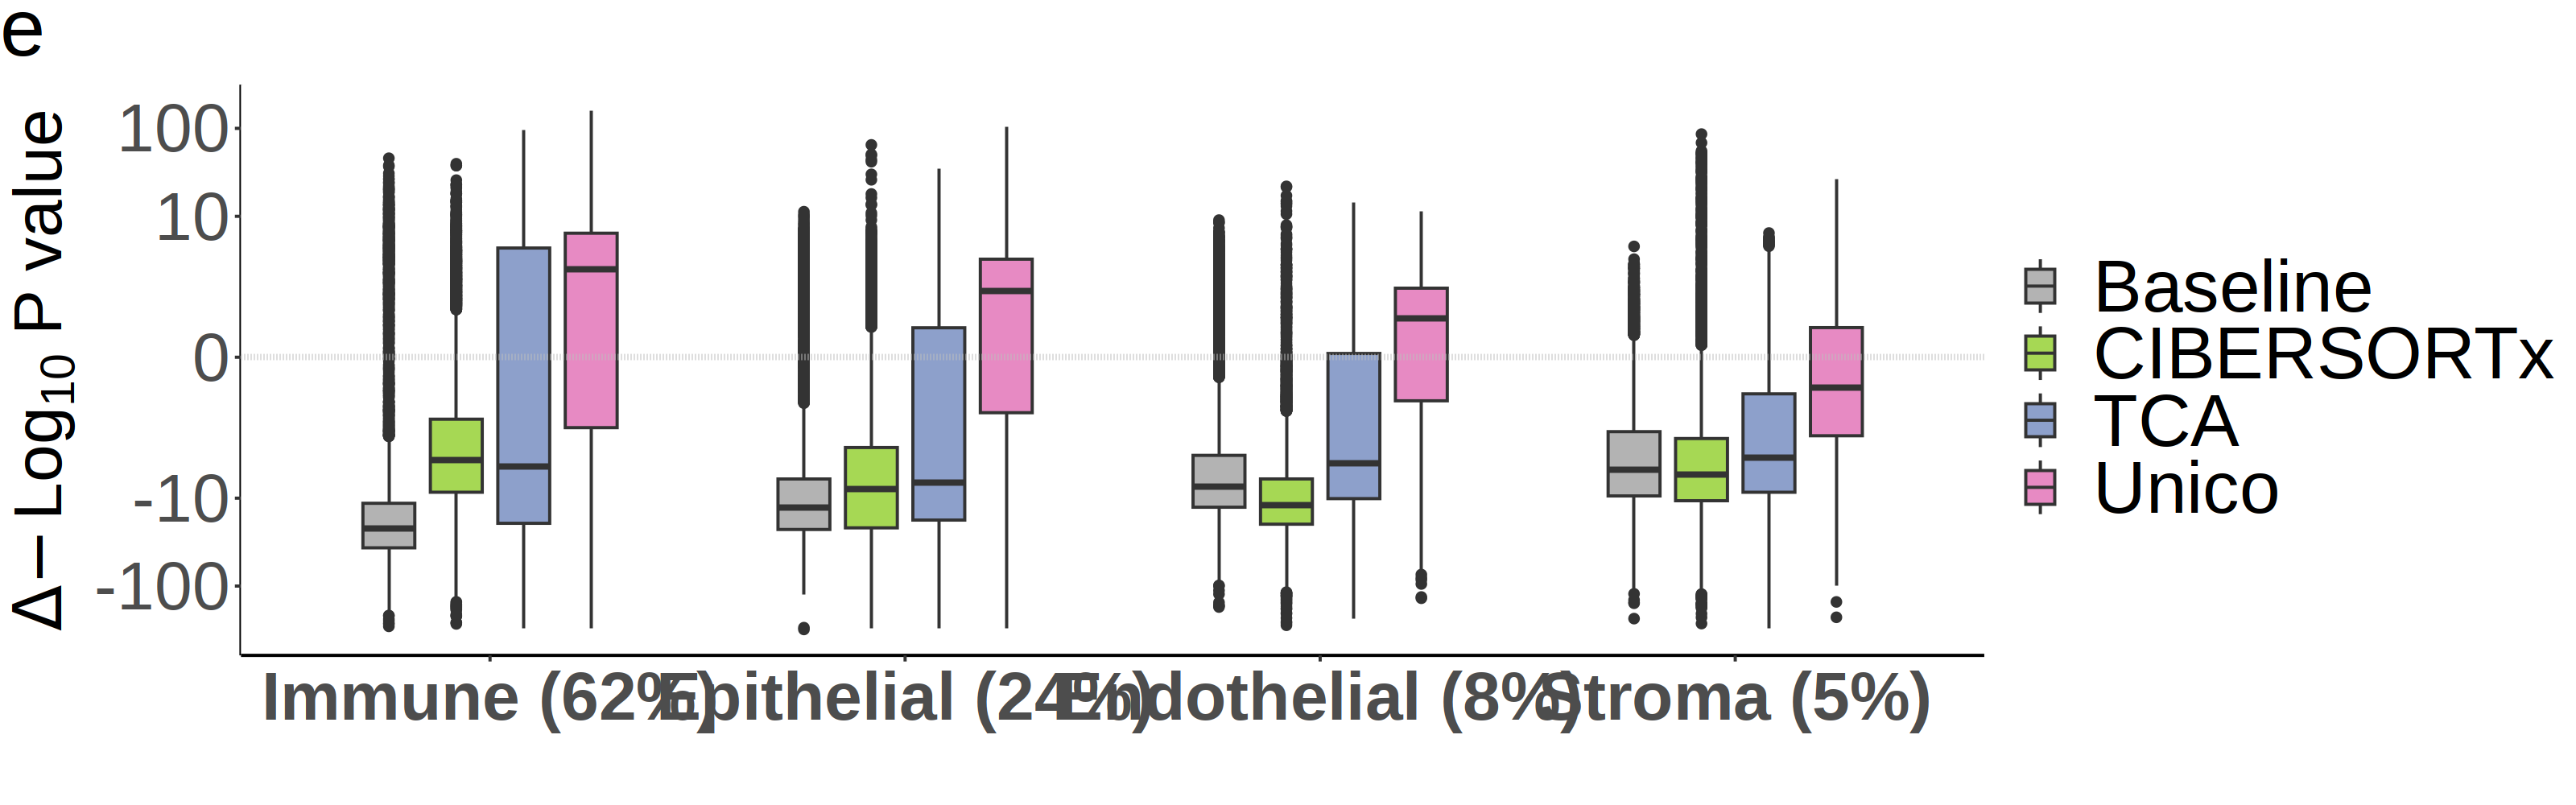

In [38]:
figure.width  = (k) * 4
figure.height = if (source.col == "decon.L1") 4 + 1 else 4 + 2
options(repr.plot.width = figure.width, repr.plot.height = figure.height, repr.plot.res = 200)

add.box.p  = egg::ggarrange(plots = list(add.box.g), 
                           labels = c("e"), 
                           label.args = list(gp = grid::gpar(font = 20, cex =3)), 
                           debug=F)

# ggsave(file.path(figure.dir,paste0("RNA_Simulation-PBMC_", source.col,"_", N, "_addition.signal.box.pdf")), 
#        add.box.g,
#        device = "pdf", width = (k) * 4, height = if (source.col == "decon.L1") 4 + 1 else 4 + 2, dpi = 600)

# multi

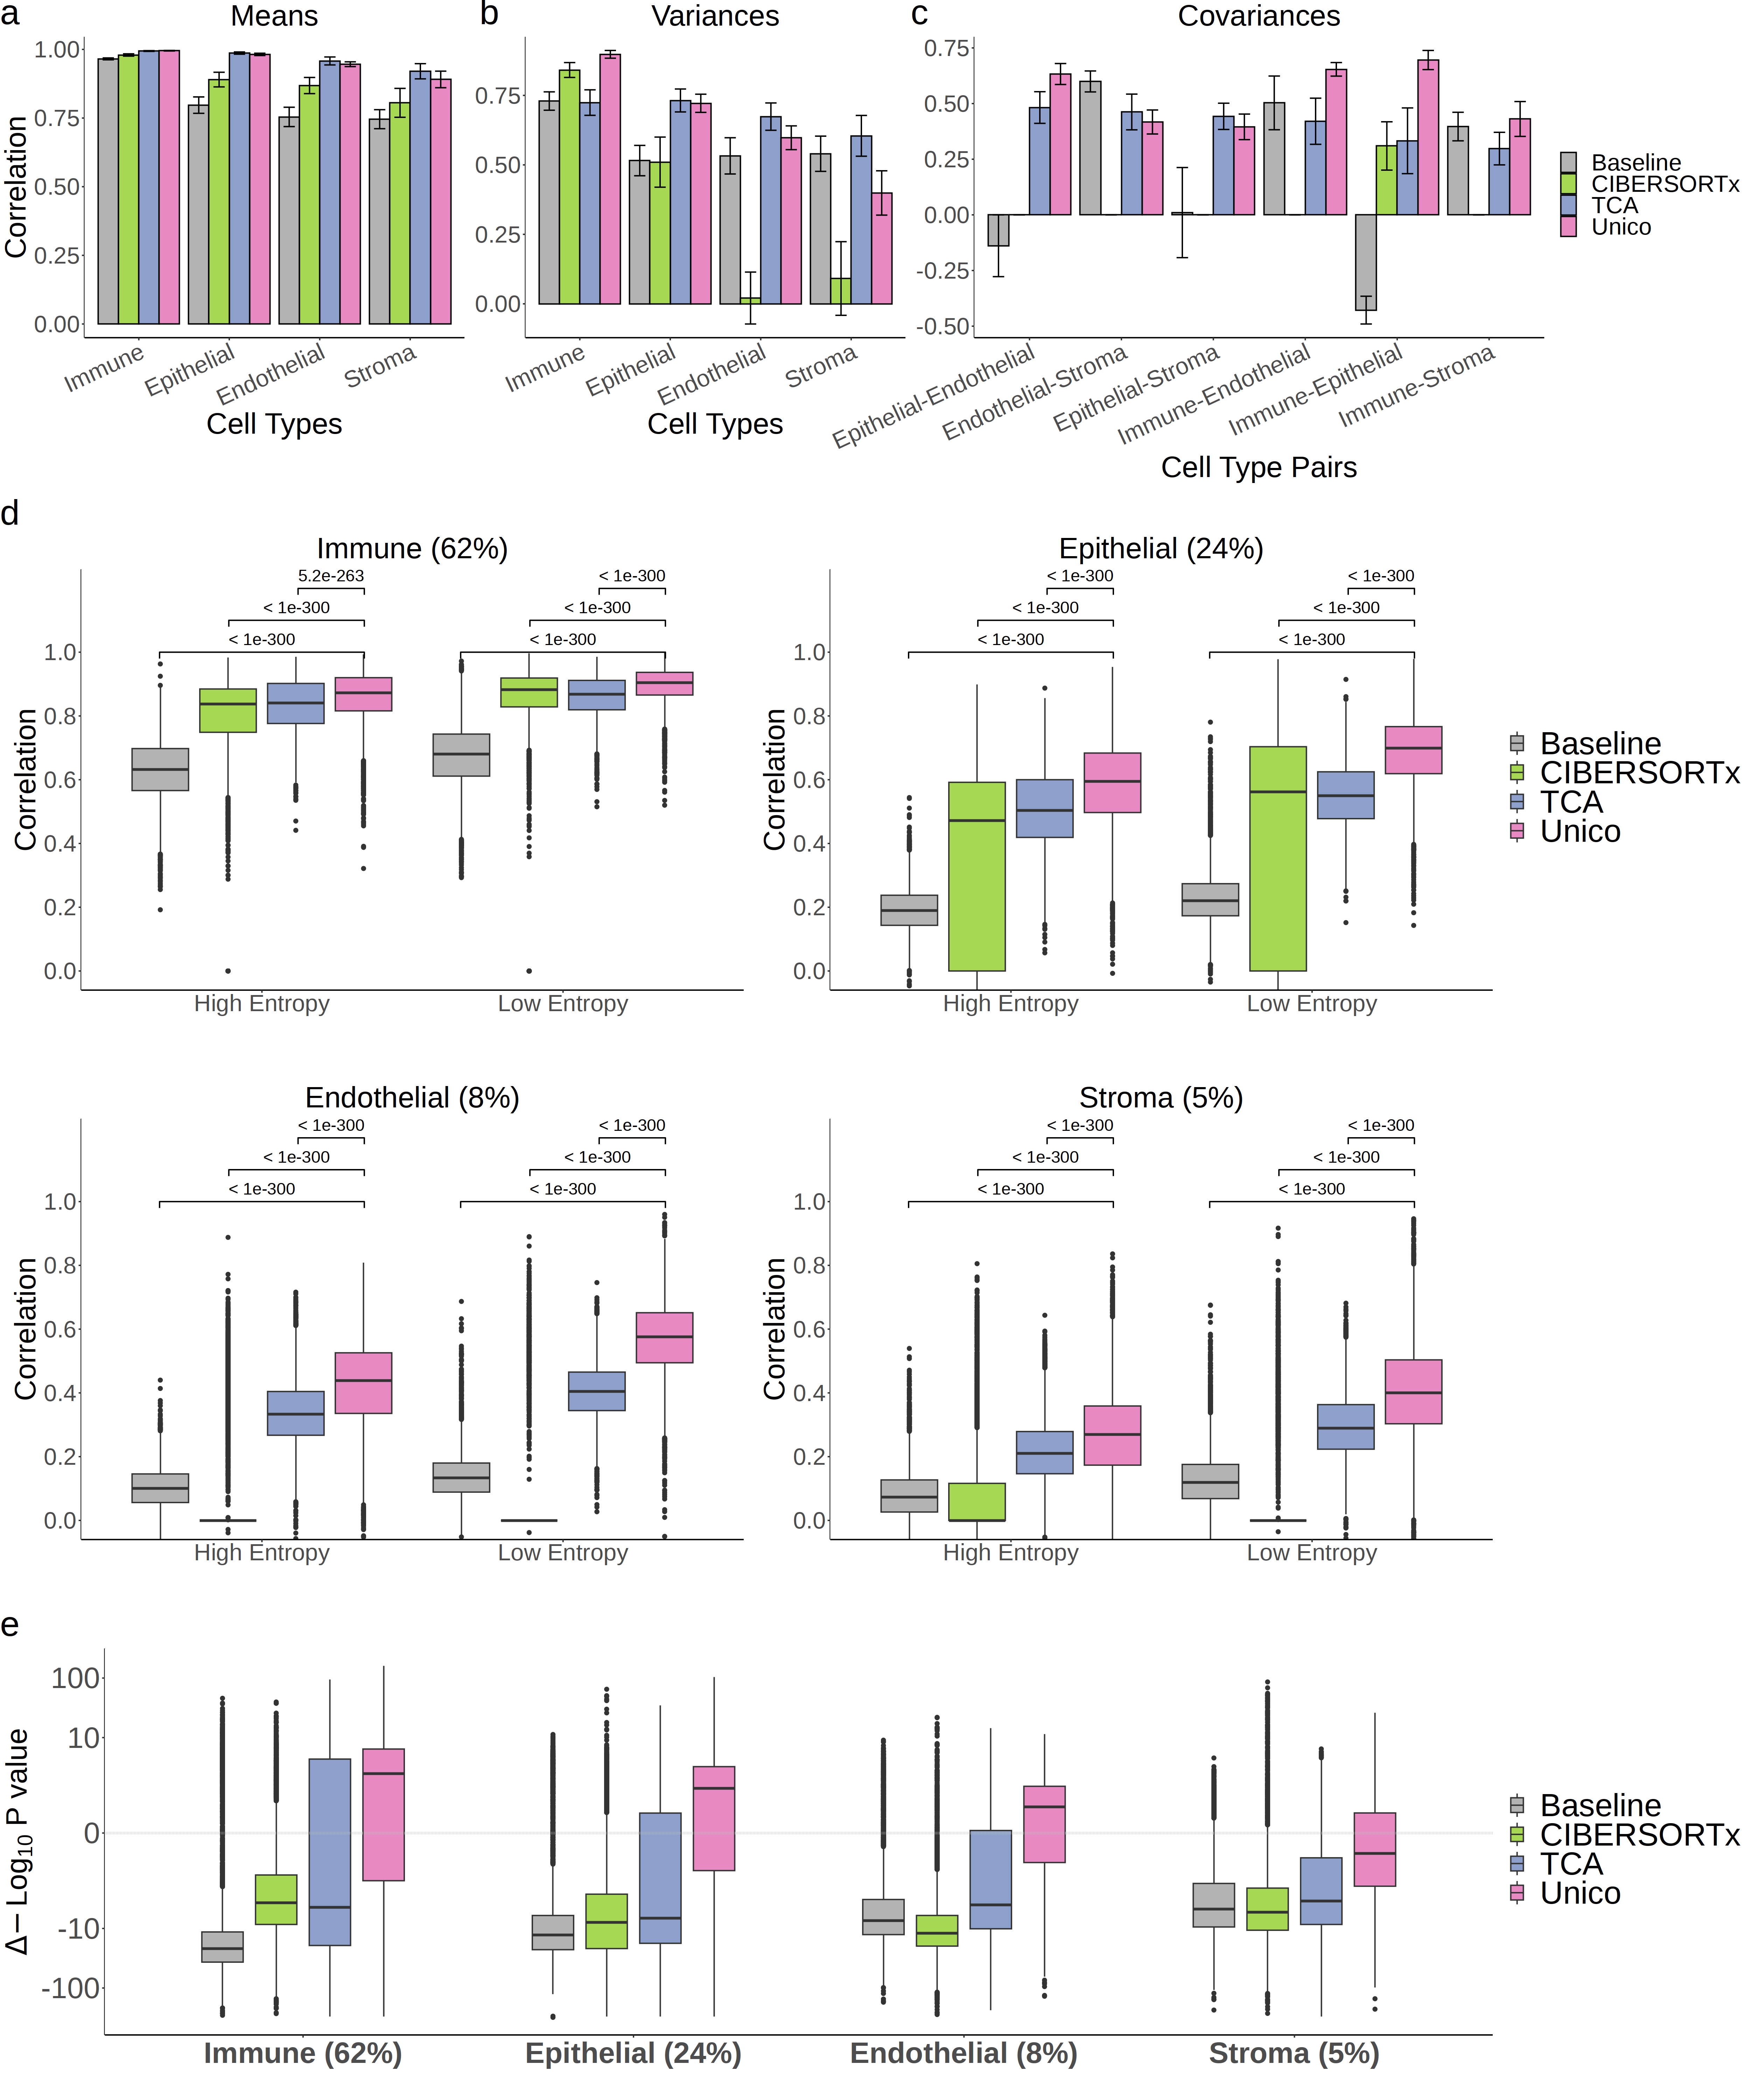

In [39]:
options(repr.plot.width = 25, repr.plot.height = 30, repr.plot.res = 200)
multi.g = ggarrange(params.bar.g, NULL,
                    cor.box.g, NULL,
                    add.box.p, 
                    nrow = 5,
                    heights = c(1,0.025, 2.25,0.025, 1),
                    font.label = list(size = 25, color = "black", face = "bold", family = NULL))
multi.g

In [40]:
ggsave(file.path(figure.dir, paste0("RNA_Simulation-Lung_", source.col,"_", N, "_multi.pdf")), multi.g,
       device = "pdf", width = 25, height = 30, dpi = 600)

## Save related object for merged plots and for extracting summary numbers 

In [41]:
fig.list = list(mean.bar.g = mean.bar.g, 
                var.bar.g = var.bar.g, 
                covar.bar.g = covar.bar.g, 
                Z.corrs.g = plts,
                add.box.g = add.box.g)

stats.list = list(covar.barplot.df = covar.barplot.df,
                  mean.barplot.df = mean.barplot.df,
                  var.barplot.df = var.barplot.df,
                  boxplot.meta = boxplot.meta, 
                  Z.corrs.list = Z.corrs.list,
                  addition.box.dfs = addition.box.dfs)


saveRDS(fig.list,   file.path(figure.dir, paste0("RNA_Simulation-Lung_", source.col,"_", N, "_fig.list.rds")))
saveRDS(stats.list, file.path(figure.dir, paste0("RNA_Simulation-Lung_", source.col,"_", N, "_stats.list.rds")))

In [42]:
# median.corr           = matrix(0, length(methods), length(source.ids))
# rownames(median.corr) = methods
# colnames(median.corr) = source.ids
# low.entropy.median.corr  = copy(median.corr)
# high.entropy.median.corr = copy(median.corr)

# for (method in methods){
#     median.corr[method, ] = colMedians(Z.corrs.list[[method]], na.rm = T)
#     low.entropy.median.corr[method, ]  = colMedians(Z.corrs.list[[method]][Z.corrs.list[["eval.entropies"]] == 'Low Entropy', ], na.rm = T)
#     high.entropy.median.corr[method, ] = colMedians(Z.corrs.list[[method]][Z.corrs.list[["eval.entropies"]] == 'High Entropy', ], na.rm = T)
# }

# median.corr

# low.entropy.median.corr

# high.entropy.median.corr

# low.entropy.median.corr["TCAx", ]/low.entropy.median.corr["TCA", ]

# high.entropy.median.corr["TCAx", ]/high.entropy.median.corr["TCA", ]

# parameters: density plots

In [43]:
# pre tensor 
# post tensor 

# density: per gene, cor(lower tri including diag) 
# gt vs post tensor 
# gt vs pre tensor 

# insight: 
# post tensor vs pre tensor : 0.99
# 0.2, 0.3, 0.4 -> 0.99, 0.994, 0.995

# parameters: variance scatter

In [44]:
var_scatter = function(method, mdl.list, sim.data.list){
    ref = list(length(mdl.list))
    hat = list(length(mdl.list))
    k = dim(mdl.list[[1]]$"params.hat.eval"$sigmas)[2]
    m = dim(mdl.list[[1]]$"params.hat.eval"$sigmas)[1]
    source.ids = dimnames(mdl.list[[1]]$"params.hat.eval"$sigmas)[[2]]

    for (t in 1:length(mdl.list)){

        ref.mat = matrix(0, m, k)
        colnames(ref.mat) = source.ids
        hat.mat = matrix(0, m, k)
        colnames(hat.mat) = source.ids

        for (l in 1:k){
            ref.mat[,l] = sim.data.list[[t]][["params.scale"]]$sigmas[,l,l]
            hat.mat[,l] = mdl.list[[t]][["params.hat.eval"]]$sigmas[,l,l]
        }
        ref[[t]] = ref.mat
        hat[[t]] = hat.mat
    }
    ref = Reduce(rbind, ref)
    hat = Reduce(rbind, hat)

    plts <- vector(mode = "list", length = k)
    for (l in 1:k){
        source.id = source.ids[l]
        g = ggplot(data.frame(ref = ref[, source.id], 
                              hat = hat[, source.id]), aes(x = ref, y = hat))+ 
            geom_point(alpha = 0.25, size = 1) + 

            theme_classic() +
            ggtitle(paste0(method, " ", source.id, ' rob_cor: ', 
                           round(colMeans(concat_2_keys(mdl.list,       
                                                        key1 = "moment.hat.corrs", 
                                                        key2 = "var.rob.corrs"))[source.id], 
                                 3))) + 
            theme(plot.title = element_text(hjust = 0.5, size = title.size)) +
            xlab(paste0("Ground Truth Variance")) + 
            ylab(paste("Estimated Variance")) + 

            theme(text=element_text(size=lab.size))+
            coord_cartesian(ylim = c(0, quantile(hat[, source.id], c(0.95))), 
                            xlim = c(0, quantile(ref[, source.id], c(0.95))))

        plts[[l]] = g
    }
    var.scatter.g <- ggarrange(plotlist = plts, ncol = k, nrow = 1)
    return(var.scatter.g)
}

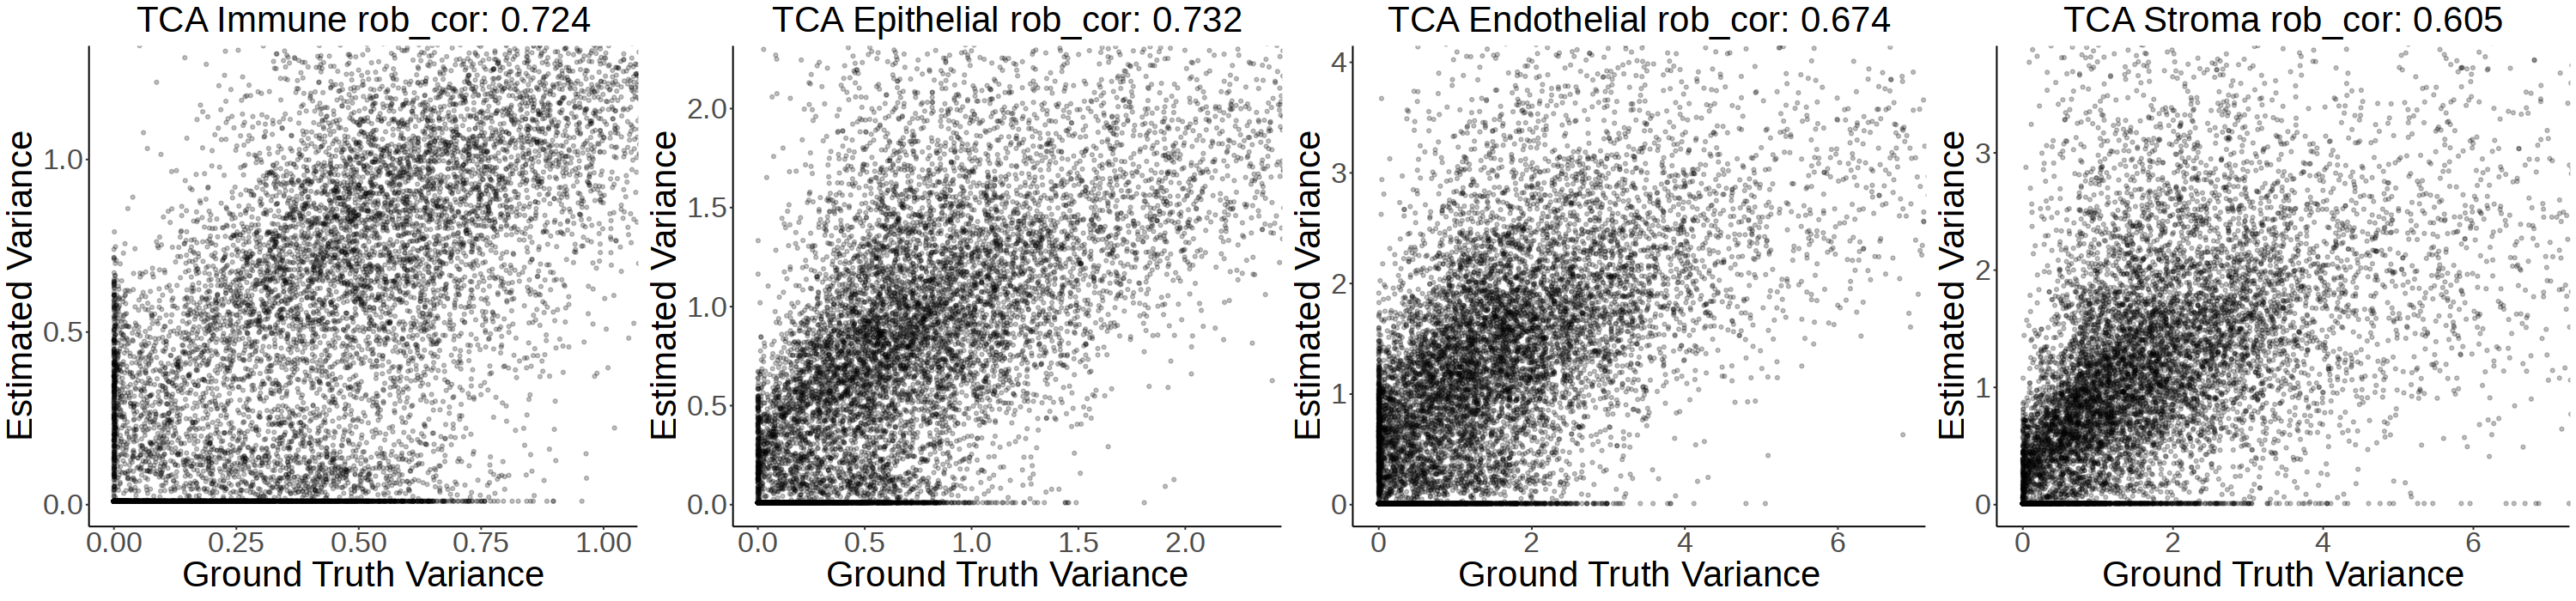

In [45]:
options(repr.plot.width = 30, repr.plot.height = 7, repr.plot.res = 100)
var_scatter(method = "TCA", mdl.list = tca.mdl.list, sim.data.list = sim.data.list)

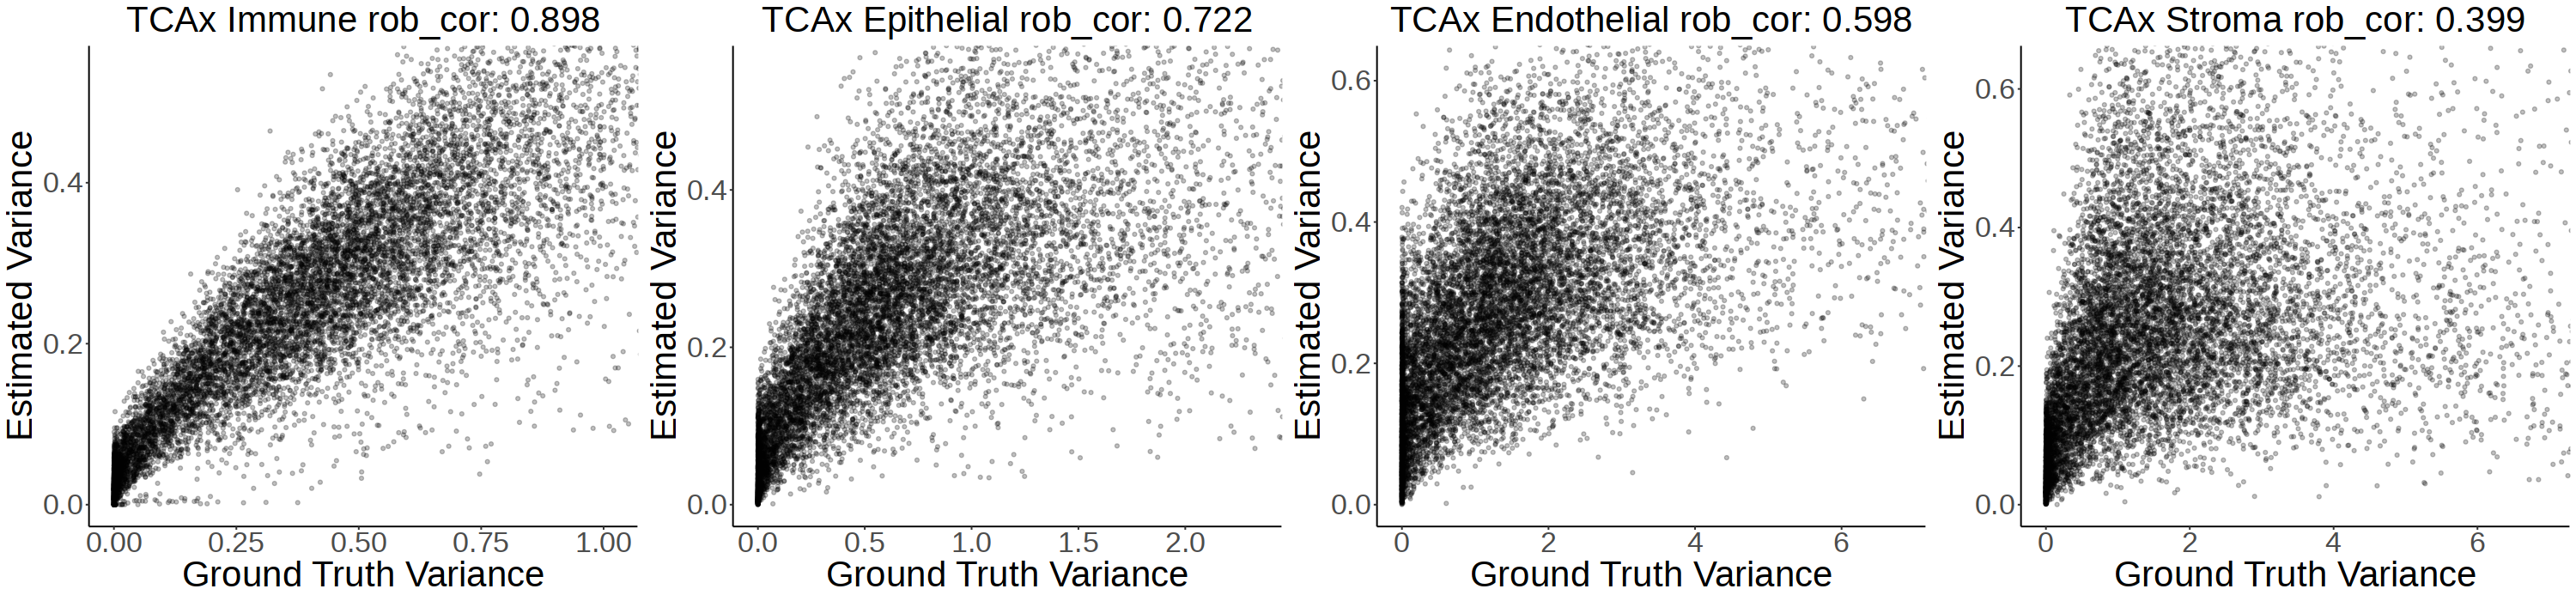

In [46]:
options(repr.plot.width = 30, repr.plot.height = 7, repr.plot.res = 100)
var_scatter(method = "TCAx", mdl.list = tcax.mdl.list, sim.data.list = sim.data.list)

# parameters: covariance scatter 